In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bootcampviztools import *

In [93]:
names = pd.read_csv('./tracks.csv').iloc[:, 1:]
names

,track_name,artist_name,album_name,duration_s,release_date,popularity,explicit,track_id,artist_id,genres,Productora,colab,duration,tempo,key,avg_rms,avg_flatness,num_onsets,onset_density
0,GRAN VÍA,"Quevedo, Aitana",BUENAS NOCHES,213.528,2024-11-22,74,False,2kQ1OvmMzs1xdlH020aJJh,52iwsT98xCoGgiGntTiR7K,reggaeton,DQE PRODUCTIONS,True,213.530748,161.50,5,0.298198,0.025699,819,3.835513
1,SHIBATTO,Quevedo,BUENAS NOCHES,138.226,2024-11-22,67,False,41VnmHAkCUsCStYdDUibpp,52iwsT98xCoGgiGntTiR7K,reggaeton,DQE PRODUCTIONS,False,139.830612,99.38,8,0.276049,0.040778,517,3.697331
2,Si Antes Te Hubiera Conocido,KAROL G,Si Antes Te Hubiera Conocido,195.824,2024-06-21,87,False,6WatFBLVB0x077xWeoVc2k,790FomKkXshlbRYZFtlgla,"reggaeton, latin, urbano latino",UNIVERSAL,False,274.796599,129.20,3,0.245466,0.017670,1093,3.977487
3,KASSANDRA,Quevedo,BUENAS NOCHES,183.172,2024-11-22,68,False,6mP16Mr2X3ZU2bNmWBUqzK,52iwsT98xCoGgiGntTiR7K,reggaeton,DQE PRODUCTIONS,False,209.130567,117.45,5,0.255236,0.035691,498,2.381287
4,DEGENERE 👑 (feat. benny blanco),"Myke Towers, benny blanco",DEGENERE 👑 (feat. benny blanco),130.880,2024-10-16,72,True,4xISUrw0t2elabEhKrtAJ0,7iK8PXO48WeuP03g8YR51W,"reggaeton, trap latino, urbano latino",ONE WORLD MUSIC,True,132.748526,198.77,9,0.269947,0.040845,530,3.992511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pégate,Standly,Pégate,186.096,2022-01-03,71,False,3E8xyYdIPpiH2wNEozE68I,0rjms710nwQTdrQheXHJfz,"reggaeton chileno, chilean trap, chilean mambo...",SONY MUSIC,False,183.507347,99.38,9,0.241643,0.026204,775,4.223264
96,Revolú,"Rauw Alejandro, Feid",Revolú,215.511,2024-11-14,56,True,0Fpw7AgVXI9Nql2vLbJAhP,1mcTU81TzQhprhouKaTkpq,"reggaeton, urbano latino, trap latino, latin",SONY MUSIC,True,215.516054,99.38,8,0.297087,0.021825,776,3.600660
97,Orgullosa De Papá,"Cano, Rvfv",Orgullosa De Papá,174.174,2024-09-26,49,False,3lLIUWnUhRTsd5FmG2jRJT,60ZOYUFnCYEeKYsxgvPxOS,"flamenco urbano, flamenco",RABAT MUSIC SL,True,190.125034,136.00,0,0.245810,0.104432,717,3.771202
98,Columbia,Quevedo,Columbia,186.000,2023-07-07,76,False,6XbtvPmIpyCbjuT0e8cQtp,52iwsT98xCoGgiGntTiR7K,reggaeton,TASTE THE FLOOR RECORDS,False,205.310884,99.38,5,0.272934,0.023340,606,2.951621


In [94]:
df = pd.read_csv('./tracks_for_eda.csv', encoding='ISO-8859-1', sep=';').iloc[:, 1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track_name               100 non-null    object 
 1   artist_name              100 non-null    object 
 2   second_artist_name       51 non-null     object 
 3   album_name               100 non-null    object 
 4   artist                   100 non-null    object 
 5   artist_popularity        100 non-null    int64  
 6   followers                100 non-null    int64  
 7   second_artist_followers  51 non-null     float64
 8   top genre                76 non-null     object 
 9   genres                   75 non-null     object 
 10  Productora               100 non-null    object 
 11  colab                    100 non-null    bool   
 12  explicit                 100 non-null    bool   
 13  release_date             100 non-null    int64  
 14  popularity               10

In [95]:
df[['track_name', 'artist_name', 'album_name', 'release_date', 'duration_s','duration', 'tempo', 'key', 'avg_rms',
       'avg_flatness', 'num_onsets', 'onset_density']] = names[['track_name', 'artist_name', 'album_name', 'release_date', 'duration_s', 'duration', 'tempo', 'key', 'avg_rms',
       'avg_flatness', 'num_onsets', 'onset_density']]

In [96]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [97]:
df.rename(columns={'duration': 'duration_yt',
                       'Productora': 'productora'}, inplace=True)

In [98]:
condicion = df.track_name == df.album_name
df['format'] = 'None'
for i in range(100):
    if condicion[i] == True:
        df['format'][i] = 'single'
    else:
        df['format'][i] = 'album'

C:\Users\Eva\AppData\Local\Temp\ipykernel_15208\4131680704.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['format'][i] = 'album'
C:\Users\Eva\AppData\Local\Temp\ipykernel_15208\4131680704.py:7: SettingWithCopyWarning: 
A value is try

In [101]:
df['dif_duration'] = round(df.duration_s - df.duration_yt)

In [102]:
# la popularidad descargada de la API y la facilitada por Organize your music, para ver si hay grandes diferencias
df['dif_pop'] = round(df.popularity - df['pop'])

### 1 Variable

#### Categórica

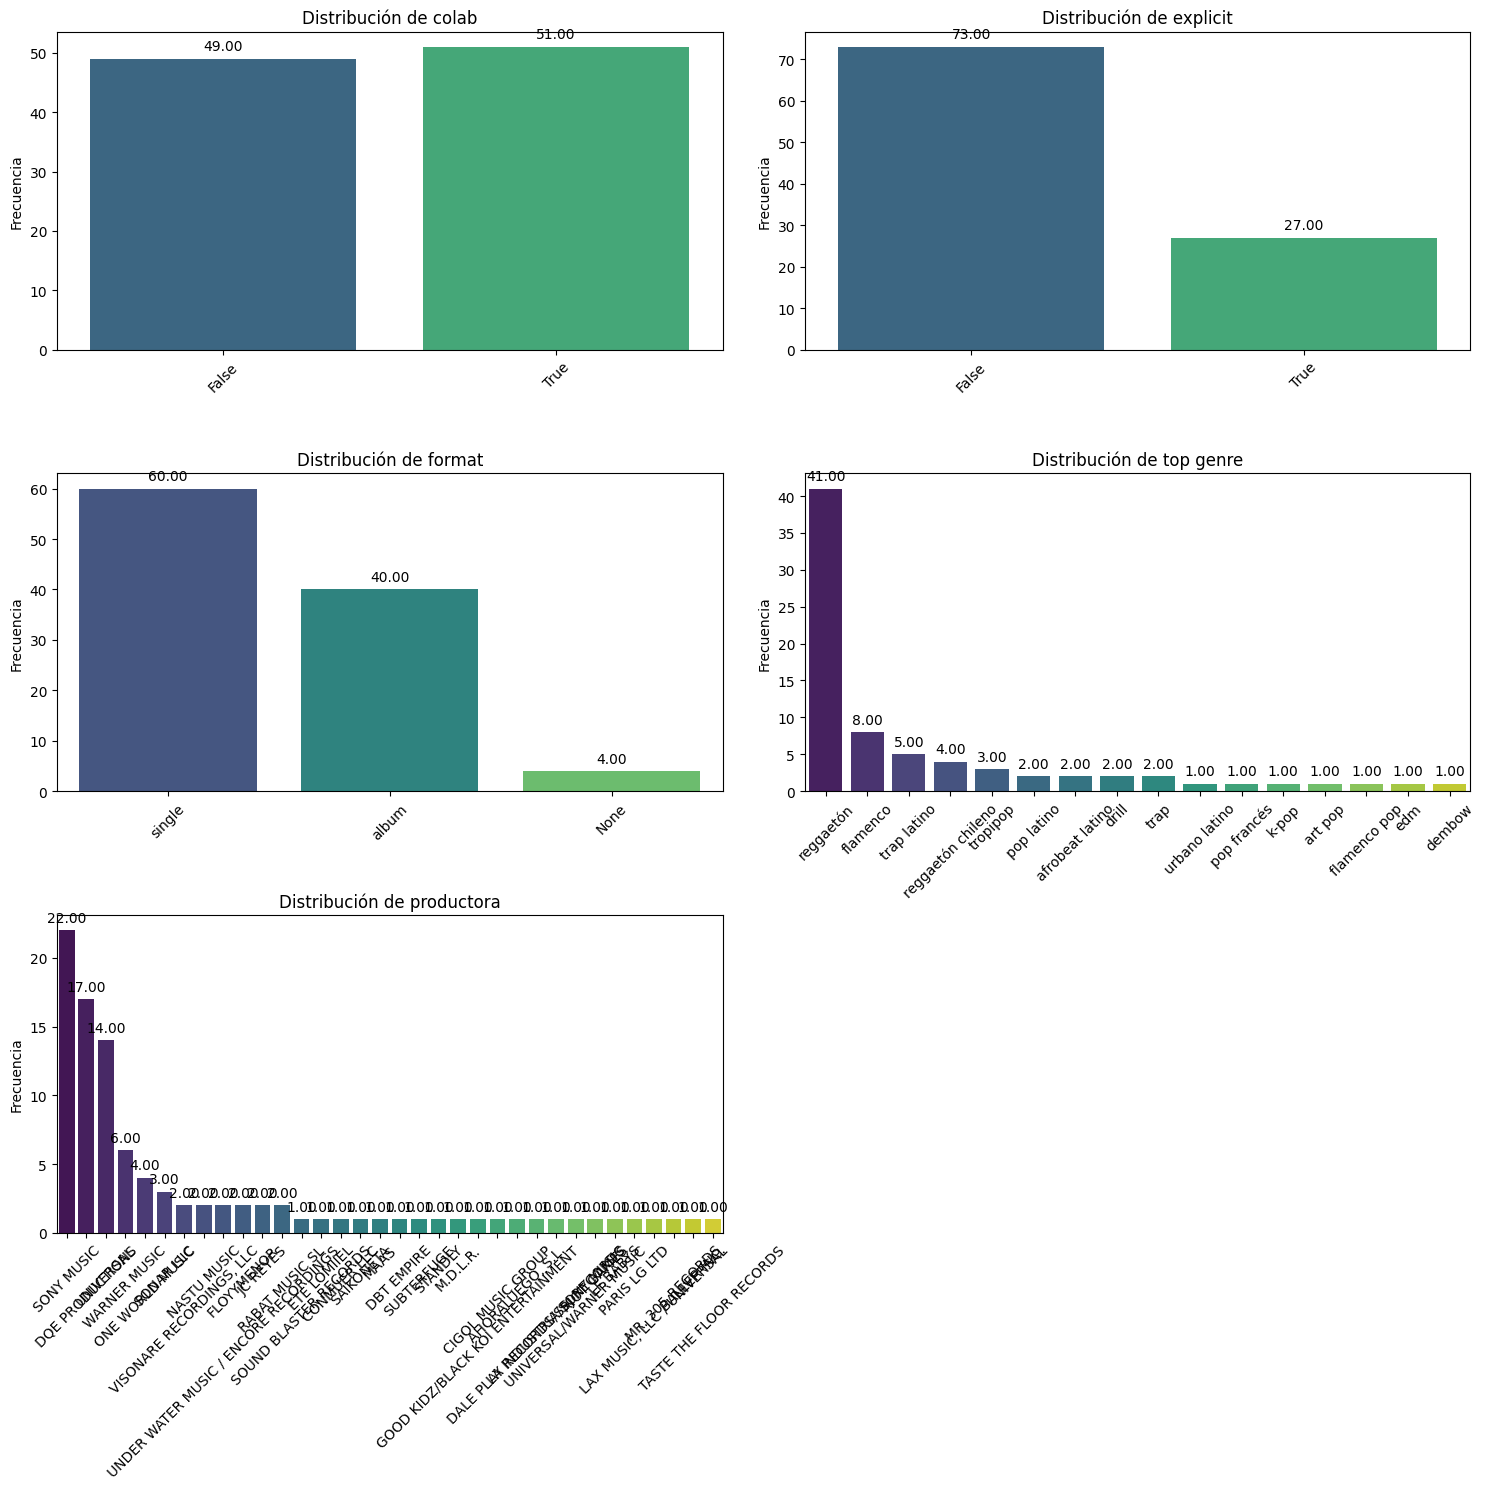

In [76]:
# 1 Variable - categóricas
pinta_distribucion_categoricas(df, ['colab', 'explicit', 'format', 'top genre', 'productora'], mostrar_valores=True)

#### Numérica

(24, 2)


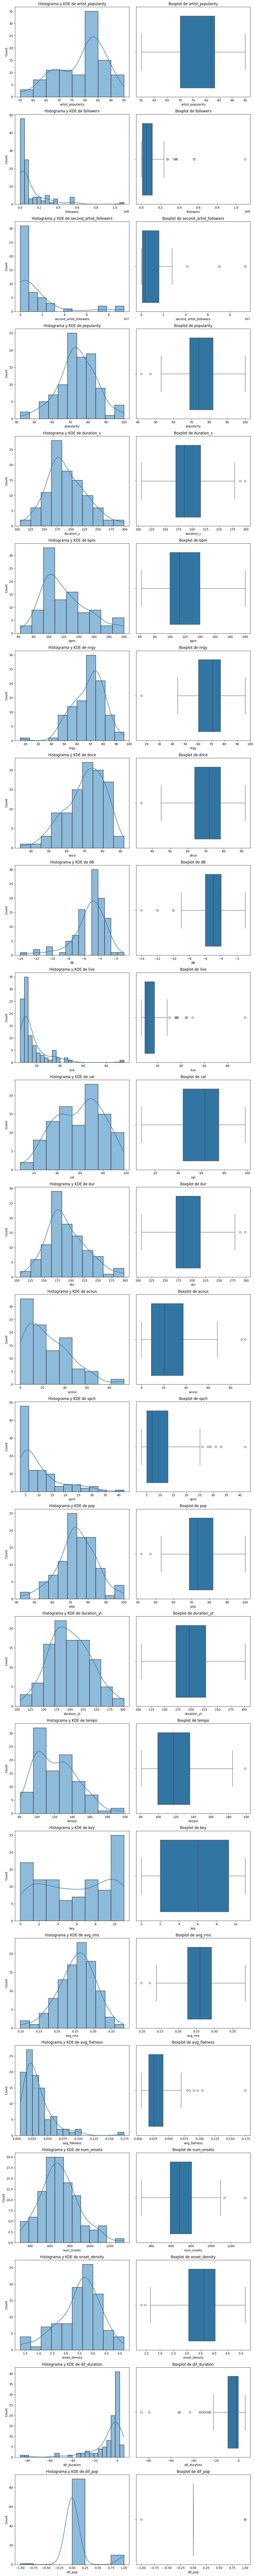

In [77]:
plot_combined_graphs(df, ['artist_popularity', 'followers', 'second_artist_followers', 'popularity', 'duration_s', 'bpm',
       'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop',
       'duration_yt', 'tempo', 'key', 'avg_rms', 'avg_flatness', 'num_onsets',
       'onset_density', 'dif_duration', 'dif_pop'])

In [78]:
df[abs(round(df.duration_s - df.dur)) > 1.01].loc[:, ['track_name','duration_s', 'dur']]

,track_name,duration_s,dur
6,IA,240.000,171.0
35,Nueva Era,217.547,247.0
51,PELIGROSA,134.930,137.0


In [104]:
# comprobamos que la que está bien es la duration_s, así que borramos esa y la de popularidad que hemos comprobado que tmp nos sirve de mucho la métrica de OYM
df.drop(['dur', 'pop', 'dif_pop'], axis=1, inplace=True)

### 2 Variables

#### Categórica vs. Numérica

In [80]:
# el df final tendrá las siguientes variables
df.columns # de entre las cuales nuestra target será 'popularity'

Index(['track_name', 'artist_name', 'second_artist_name', 'album_name',
       'artist', 'artist_popularity', 'followers', 'second_artist_followers',
       'top genre', 'genres', 'productora', 'colab', 'explicit',
       'release_date', 'popularity', 'duration_s', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'acous', 'spch', 'duration_yt', 'tempo', 'key',
       'avg_rms', 'avg_flatness', 'num_onsets', 'onset_density', 'format',
       'dif_duration'],
      dtype='object')

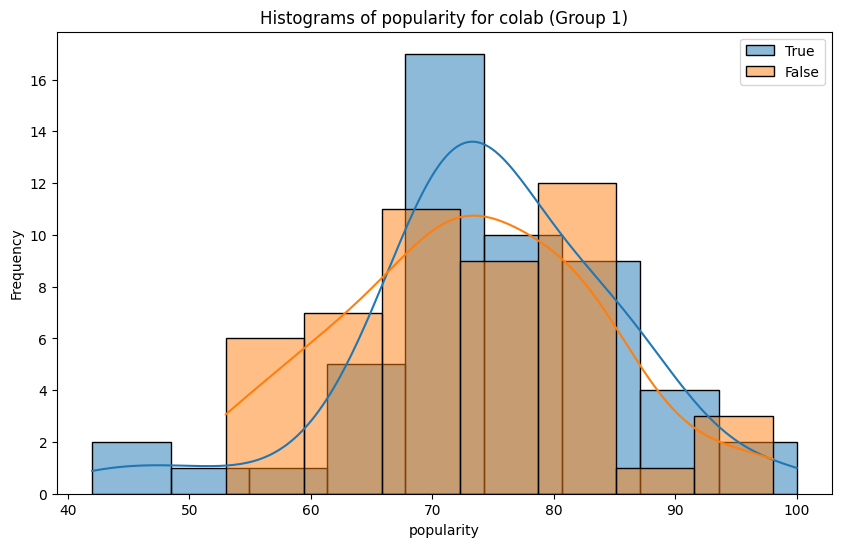

p_value: 0.3119585504174721


In [105]:
# evaluamos todas las variables categóricas contra la veriable target, y hacemos el test de significancia correspondiente
plot_grouped_histograms(df, 'colab', 'popularity', 2)
from scipy.stats import mannwhitneyu
lrs_yes = df.loc[df.colab == True, 'popularity']
lrs_no = df.loc[df.colab == False, 'popularity']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

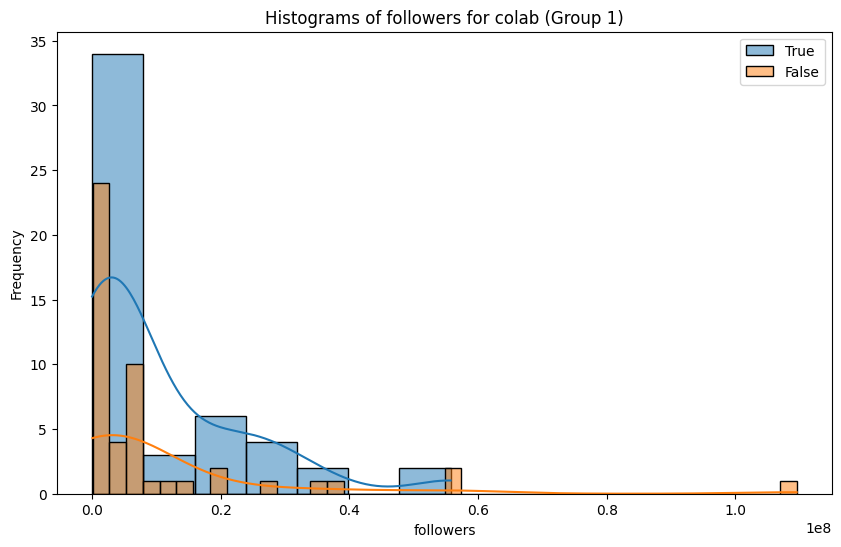

0.3558101814550254

In [106]:
# ¿Hay alguna relación entre lo famosos que sean los artistas y que colaboren en sus trabajos?
plot_grouped_histograms(df, 'colab', 'followers', 2)
from scipy.stats import mannwhitneyu
lrs_yes = df.loc[df.colab == True, 'followers']
lrs_no = df.loc[df.colab == False, 'followers']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
p_value

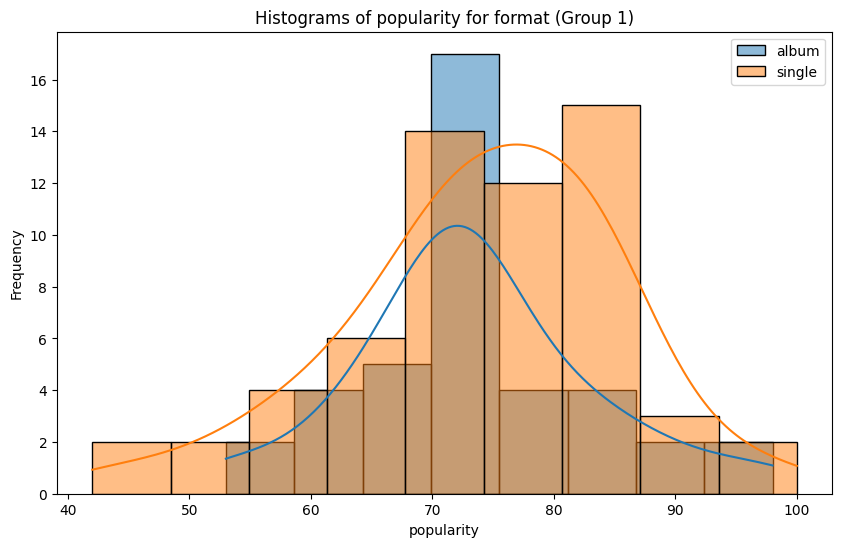

p_value: 0.40993779414948806


In [107]:
plot_grouped_histograms(df, 'format', 'popularity', 2)
from scipy.stats import mannwhitneyu
lrs_yes = df.loc[df.format == 'album', 'popularity']
lrs_no = df.loc[df.format == 'single', 'popularity']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

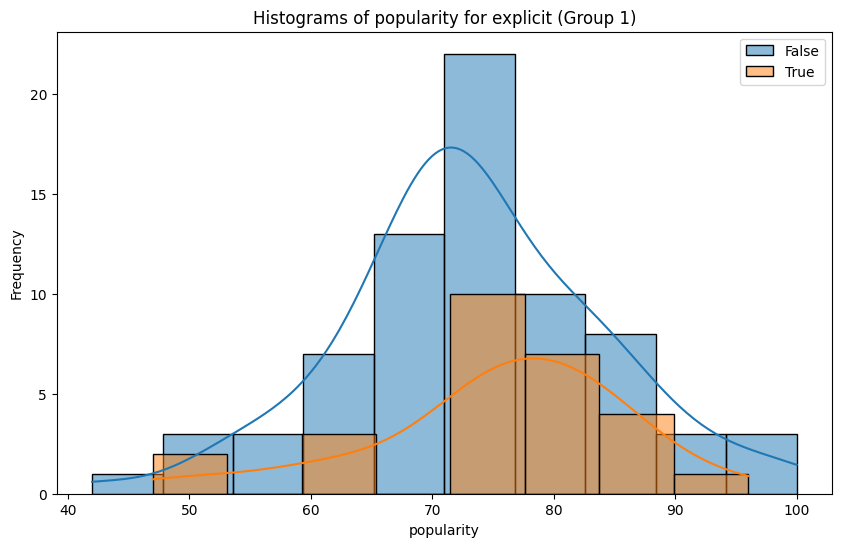

p_value: 0.1182707703015468


In [54]:
plot_grouped_histograms(df, 'explicit', 'popularity', 5)
from scipy.stats import mannwhitneyu
lrs_yes = df.loc[df.explicit == True, 'popularity']
lrs_no = df.loc[df.explicit == False, 'popularity']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

In [55]:
# el p-valor es cercano al 90%. Pensamos que los tracks más populares son los de artistas internacionales, ellos pueden ser más propensos a música no explícita pensando en que sonará en radios y medio generalistas
# de igual manera, ya que ellos hacen pop, en sentido estricto del género urbano, vamos a probar a estudar la relación entre las variables sin estos cuatro artistas líderes internacionales de habla inglesa
df.sort_values(by='popularity', ascending=False).iloc[:, :13]

,track_name,artist_name,second_artist_name,album_name,artist,artist_popularity,followers,second_artist_followers,top genre,genres,productora,colab,explicit
31,Die With A Smile,"Lady Gaga, Bruno Mars",Bruno Mars,Die With A Smile,Lady Gaga,94.0,36198112.0,70257982.0,art pop,"art pop, pop",UNIVERSAL/WARNER MUSIC,True,False
68,BIRDS OF A FEATHER,Billie Eilish,NaN,HIT ME HARD AND SOFT,Billie Eilish,95.0,109547419.0,NaN,NaN,NaN,UNIVERSAL,False,False
67,That’s So True,Gracie Abrams,NaN,The Secret of Us (Deluxe),Gracie Abrams,89.0,5076367.0,NaN,NaN,NaN,UNIVERSAL,False,True
30,APT.,"ROSÉ, Bruno Mars",Bruno Mars,APT.,ROSÉ,86.0,10804480.0,70257982.0,k-pop,k-pop,WARNER MUSIC,True,False
2,Si Antes Te Hubiera Conocido,KAROL G,NaN,Si Antes Te Hubiera Conocido,KAROL G,88.0,55739134.0,NaN,reggaetón,"reggaeton, latin, urbano latino",UNIVERSAL,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,LA 125,"Quevedo, Yung Beef",Yung Beef,LA 125,Quevedo,83.0,5754626.0,615112.0,reggaetón,reggaeton,DQE PRODUCTIONS,True,False
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


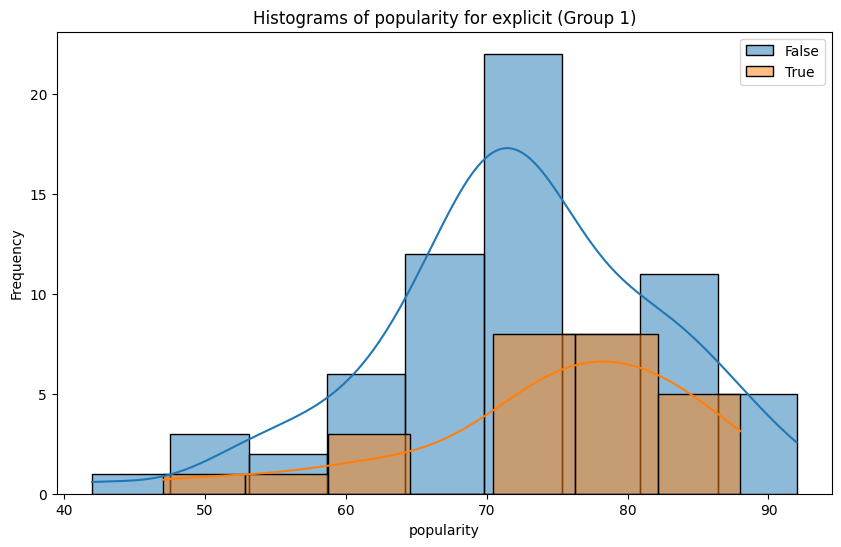

p_value: 0.08986493750188916


In [85]:
df_explicit = df[df['popularity'] < 95]
plot_grouped_histograms(df_explicit, 'explicit', 'popularity', 5)
from scipy.stats import mannwhitneyu
lrs_yes = df_explicit.loc[df.explicit == True, 'popularity']
lrs_no = df_explicit.loc[df.explicit == False, 'popularity']
u, p_value = mannwhitneyu(lrs_yes, lrs_no)
print(f'p_value: {p_value}')

##### (1) en el género urbano en español, hay una diferencia significativa al 90% en la popularidad entre los temas explícitos y los no explícitos, otorgando más popularidad que no lo sean

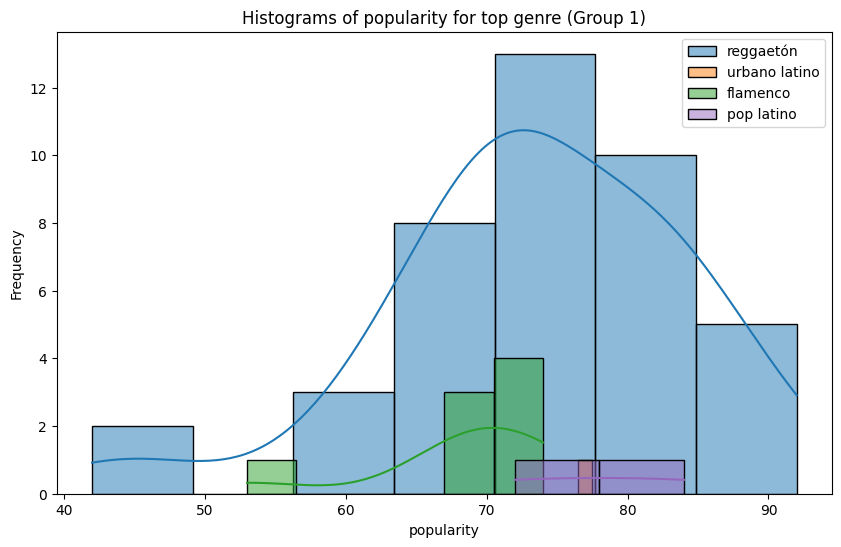

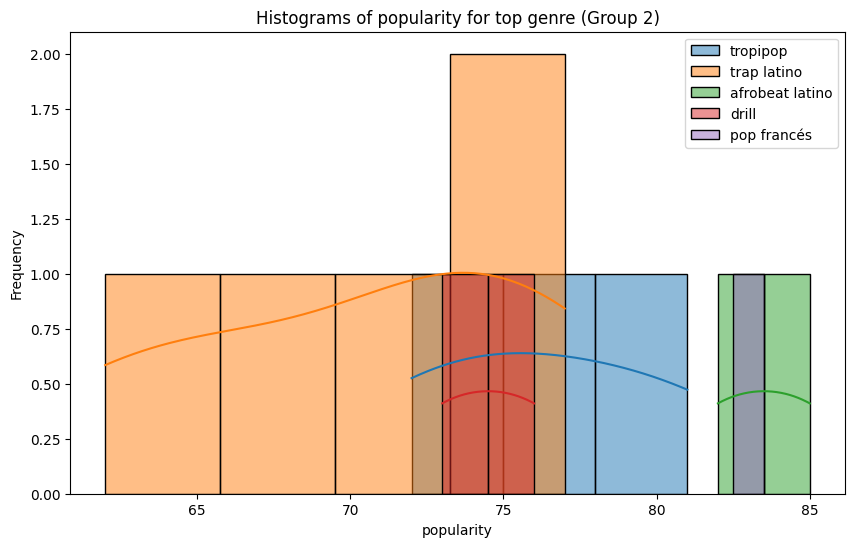

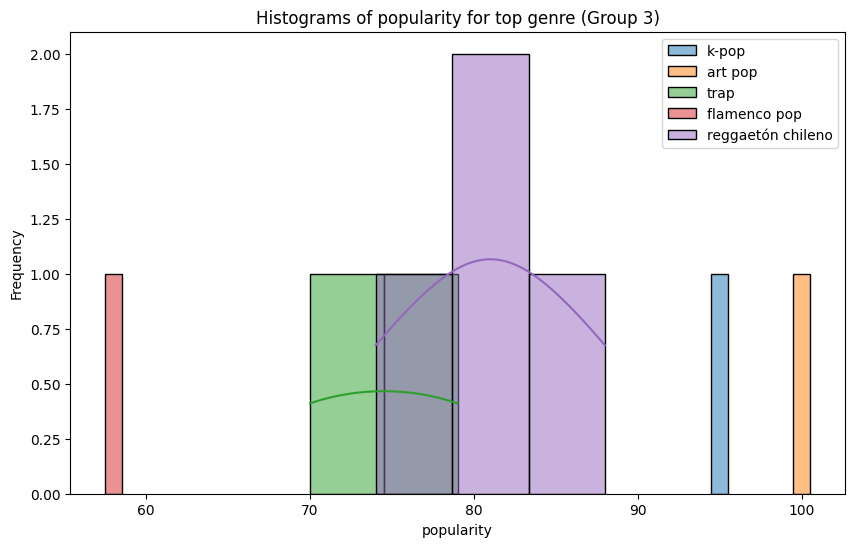

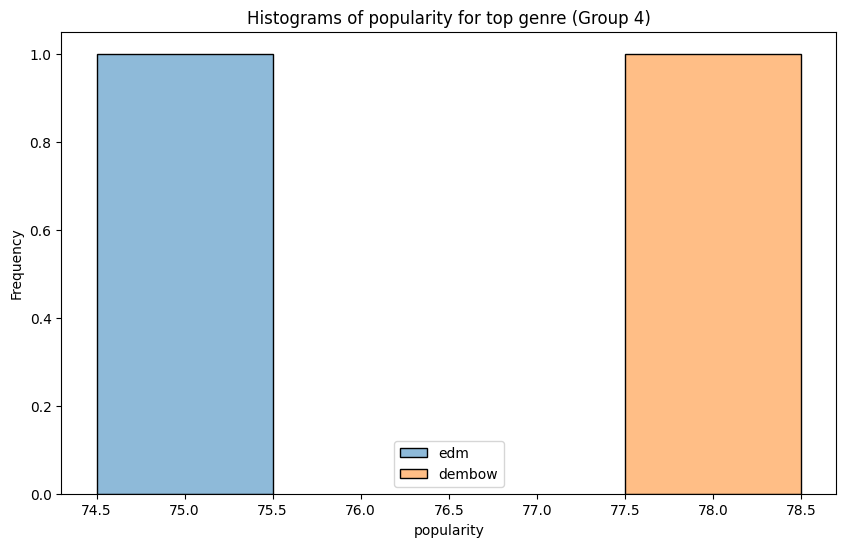

Género: reggaetón -> p_value: 0.88011
Género: urbano latino -> No hay suficientes datos para la prueba
Género: flamenco -> p_value: 0.04943
Género: pop latino -> p_value: 0.52168
Género: tropipop -> p_value: 0.62738
Género: trap latino -> p_value: 0.39703
Género: afrobeat latino -> p_value: 0.11474
Género: drill -> p_value: 0.86304
Género: pop francés -> No hay suficientes datos para la prueba
Género: k-pop -> No hay suficientes datos para la prueba
Género: art pop -> No hay suficientes datos para la prueba
Género: trap -> p_value: 0.99017
Género: flamenco pop -> No hay suficientes datos para la prueba
Género: reggaetón chileno -> p_value: 0.10527
Género: edm -> No hay suficientes datos para la prueba
Género: dembow -> No hay suficientes datos para la prueba


In [108]:
plot_grouped_histograms(df, 'top genre', 'popularity', 5)
from scipy.stats import mannwhitneyu
genres = df['top genre'].dropna().unique()

# Iterar sobre cada género y realizar la prueba U de Mann-Whitney
for genre in genres:
    group_yes = df.loc[df['top genre'] == genre, 'popularity']
    group_no = df.loc[df['top genre'] != genre, 'popularity']
    
    if len(group_yes) > 1 and len(group_no) > 1:  # Evitar errores con grupos muy pequeños
        u, p_value = mannwhitneyu(group_yes, group_no)
        print(f"Género: {genre} -> p_value: {p_value:.5f}")
    else:
        print(f"Género: {genre} -> No hay suficientes datos para la prueba")

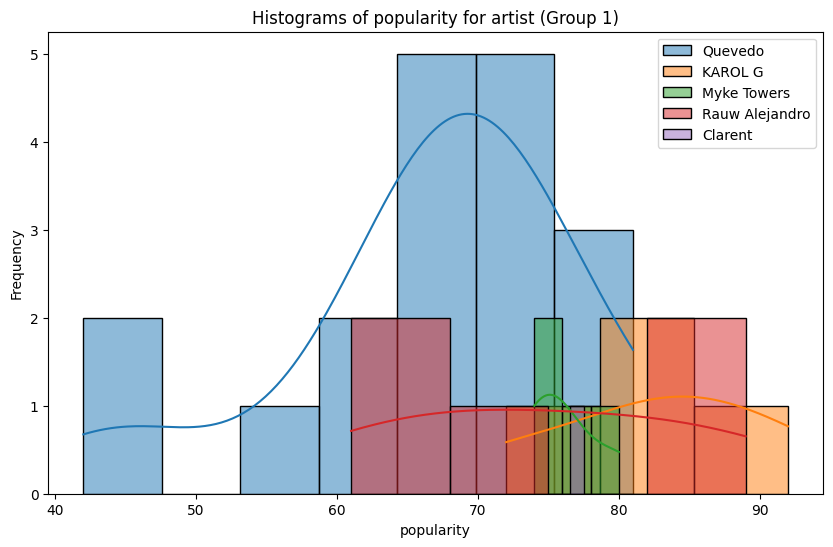

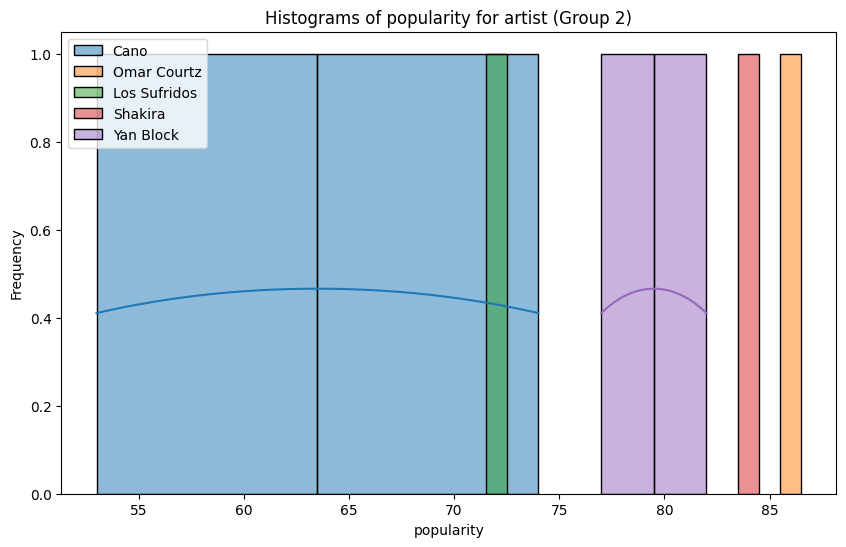

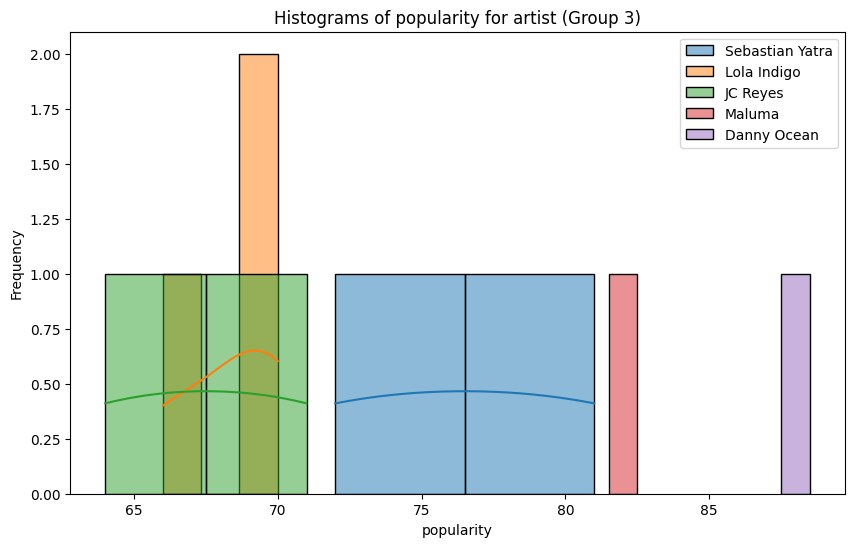

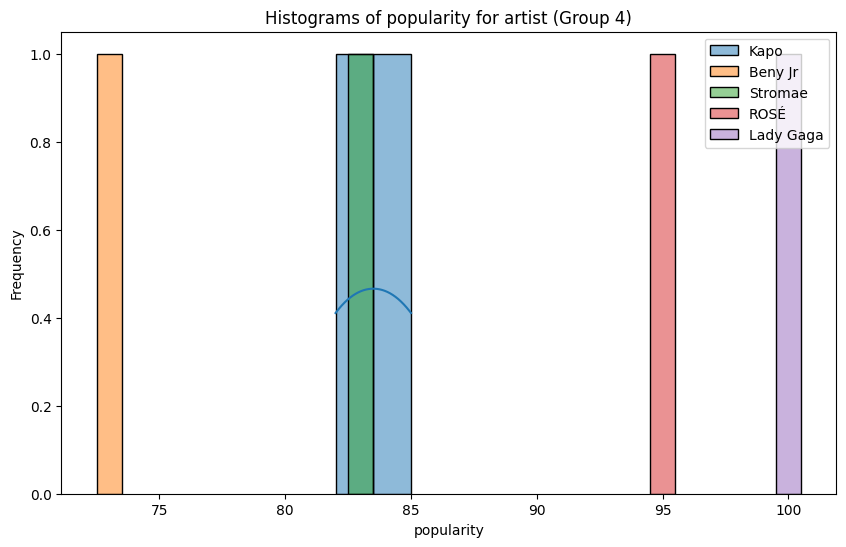

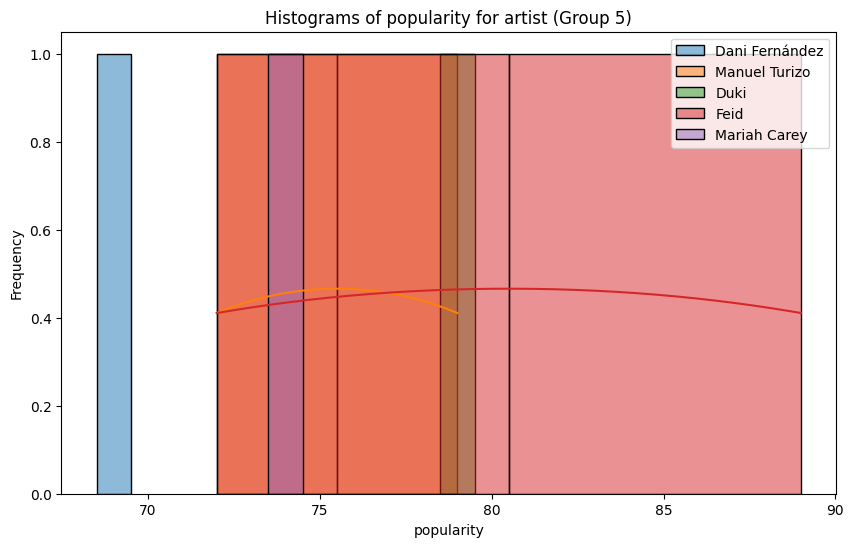

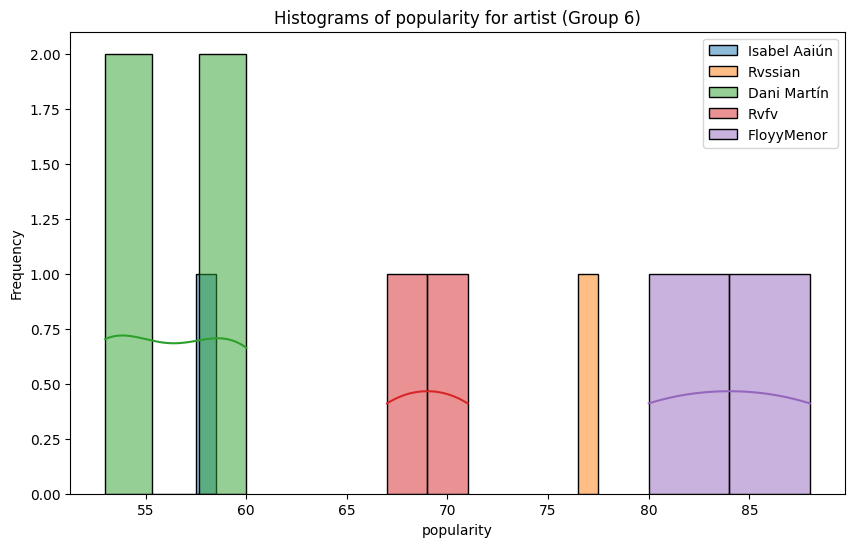

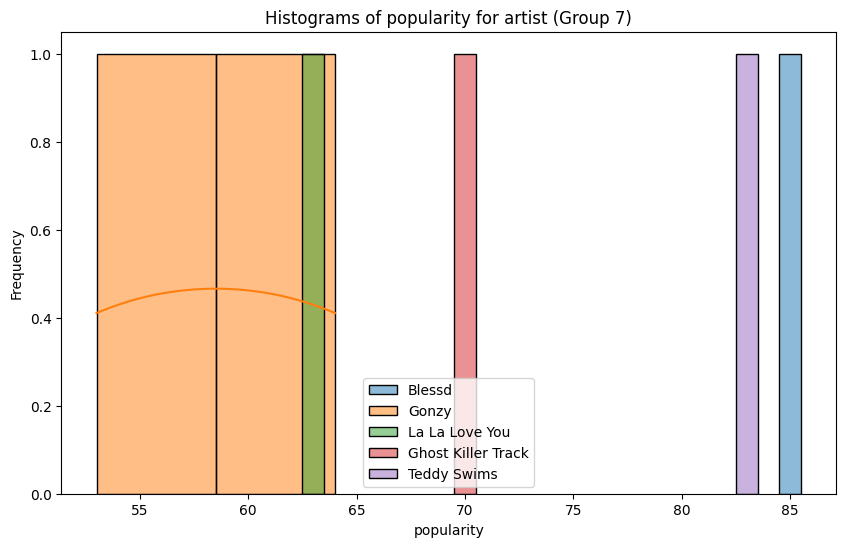

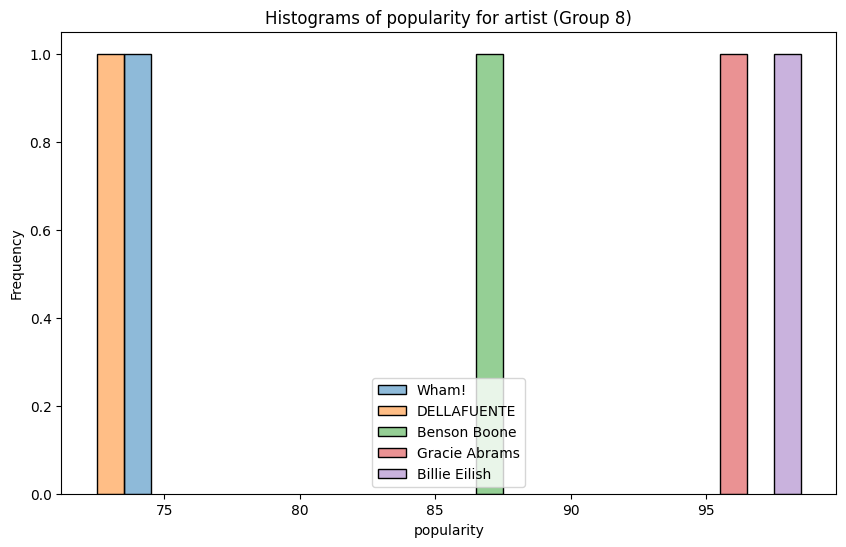

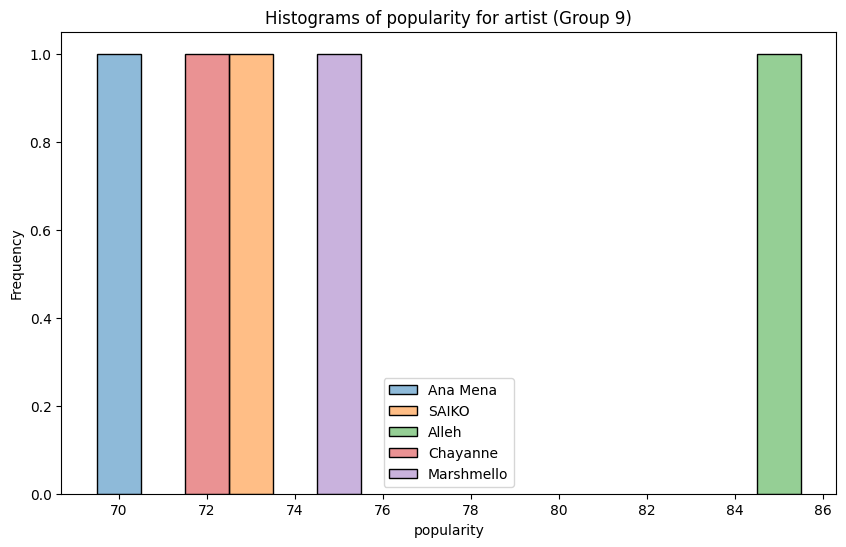

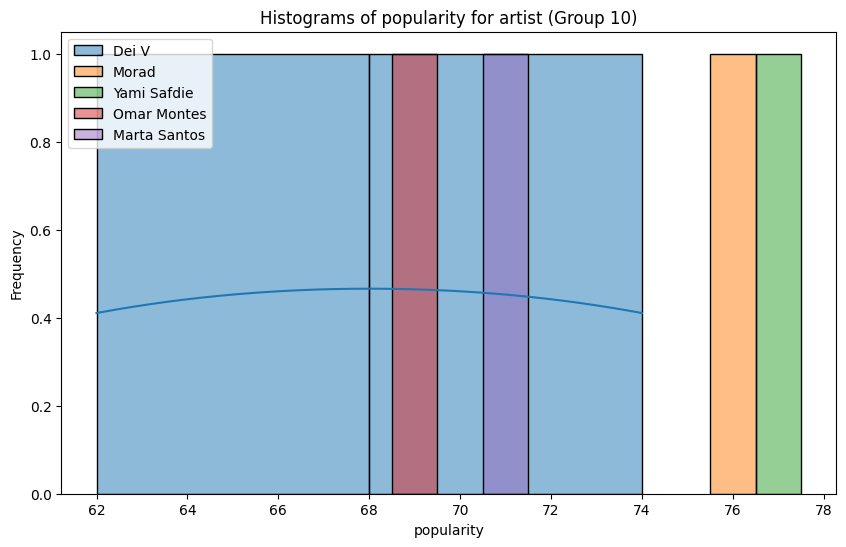

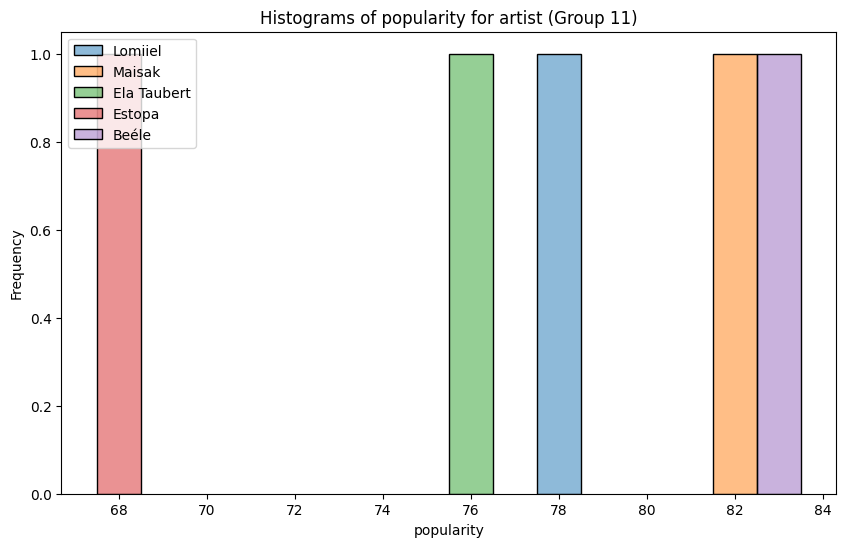

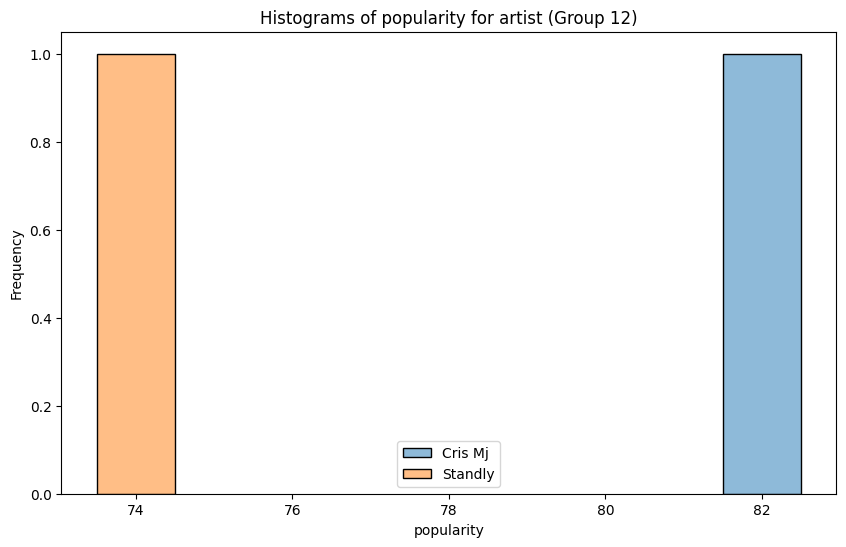

Artista: Quevedo -> p_value: 0.00124
Artista: KAROL G -> p_value: 0.06841
Artista: Myke Towers -> p_value: 0.48126
Artista: Rauw Alejandro -> p_value: 0.93062
Artista: Clarent -> No hay suficientes datos para la prueba
Artista: Cano -> p_value: 0.28927
Artista: Omar Courtz -> No hay suficientes datos para la prueba
Artista: Los Sufridos -> No hay suficientes datos para la prueba
Artista: Shakira -> No hay suficientes datos para la prueba
Artista: Yan Block -> p_value: 0.31823
Artista: Sebastian Yatra -> p_value: 0.73008
Artista: Lola Indigo -> p_value: 0.14255
Artista: JC Reyes -> p_value: 0.22250
Artista: Maluma -> No hay suficientes datos para la prueba
Artista: Danny Ocean -> No hay suficientes datos para la prueba
Artista: Kapo -> p_value: 0.11474
Artista: Beny Jr -> No hay suficientes datos para la prueba
Artista: Stromae -> No hay suficientes datos para la prueba
Artista: ROSÉ -> No hay suficientes datos para la prueba
Artista: Lady Gaga -> No hay suficientes datos para la prueba

In [110]:
plot_grouped_histograms(df, 'artist', 'popularity', 5)
from scipy.stats import mannwhitneyu
artists = df['artist'].dropna().unique()
# Iterar sobre cada género y realizar la prueba U de Mann-Whitney
for artist in artists:
    group_yes = df.loc[df['artist'] == artist, 'popularity']
    group_no = df.loc[df['artist'] != artist, 'popularity']
    
    if len(group_yes) > 1 and len(group_no) > 1:  # Evitar errores con grupos muy pequeños
        u, p_value = mannwhitneyu(group_yes, group_no)
        print(f"Artista: {artist} -> p_value: {p_value:.5f}")
    else:
        print(f"Artista: {artist} -> No hay suficientes datos para la prueba")

##### (2) Se aprecian relaciones entre el artista que eres y que tus canciones tengan una relación con la popularidad significativamente distinta a la del resto. Si eres Quevedo o Karol G, parece que es bastante garantía de que la música va a perdurar en el tiempo, igual que si eres Dani Martín, es bastante probable que después de la novedad de tu lanzamiento, a la gente le deje de interesar tu música. Luego hay otros que, aun siendo consagrados, tienen evoluciones dispares en sus canciones.

In [ ]:
df['followers_category'] = pd.qcut(df['followers'], q=4, labels=["bajo", "medio-bajo", "medio-alto", "alto"])
df.groupby('followers_category')['popularity'].agg(['mean', 'std'])

C:\Users\Eva\AppData\Local\Temp\ipykernel_20904\2578383672.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('followers_category')['popularity'].agg(['mean', 'std'])


,mean,std
followers_category,,
bajo,70.214286,10.580755
medio-bajo,74.863636,8.072855
medio-alto,71.320000,12.051003
alto,79.680000,9.136557


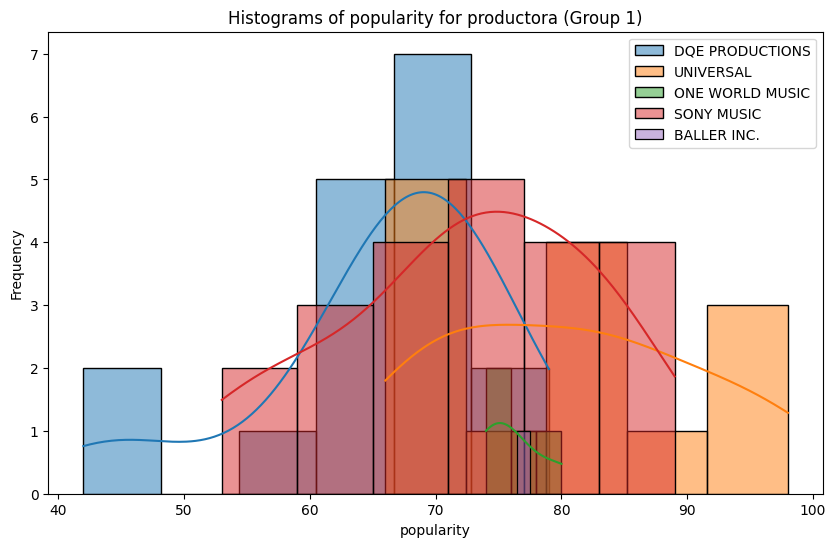

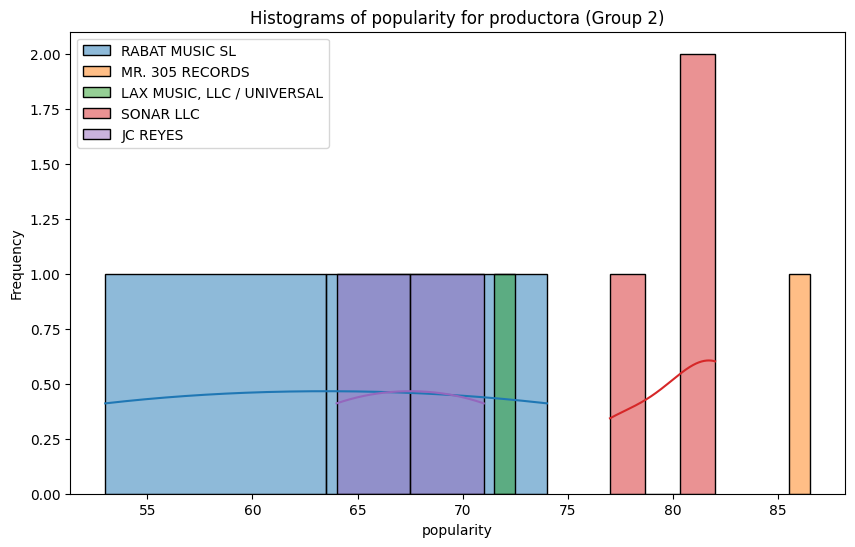

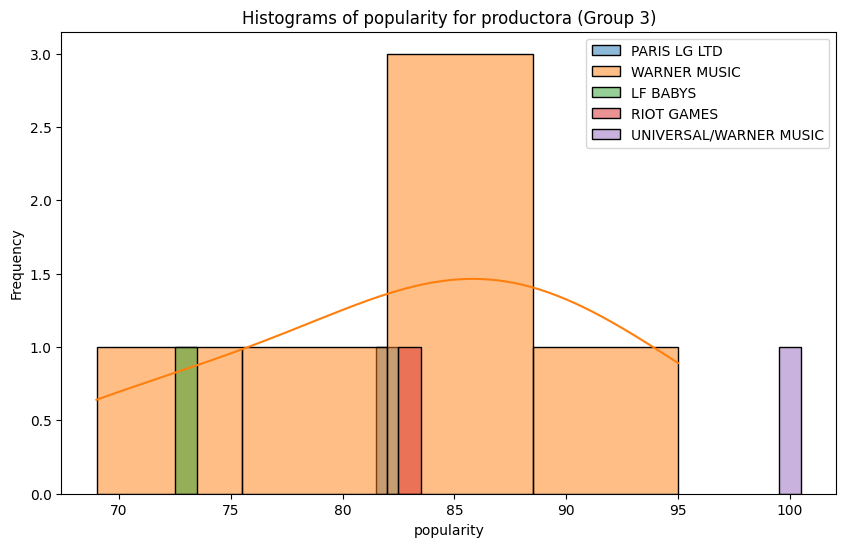

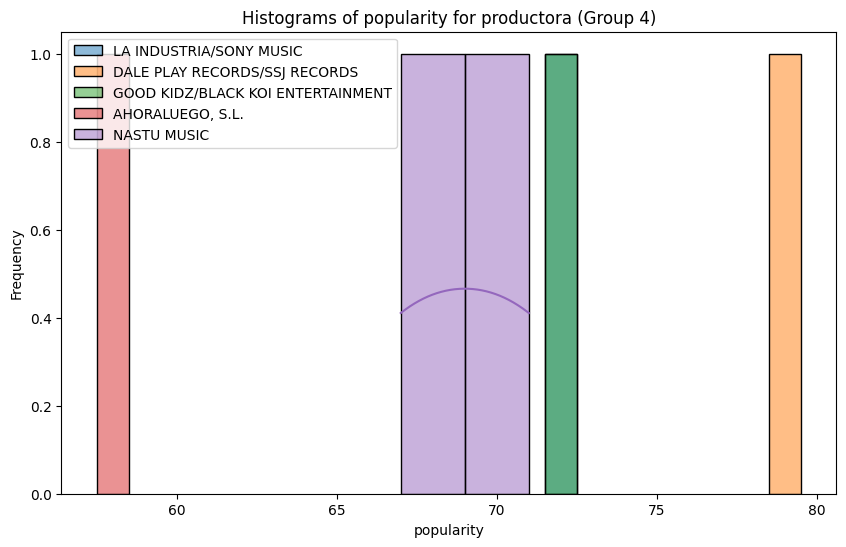

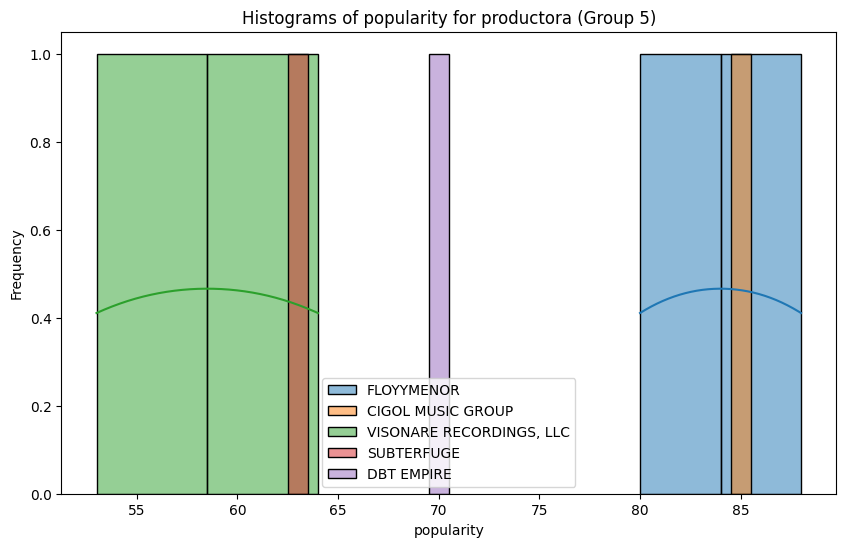

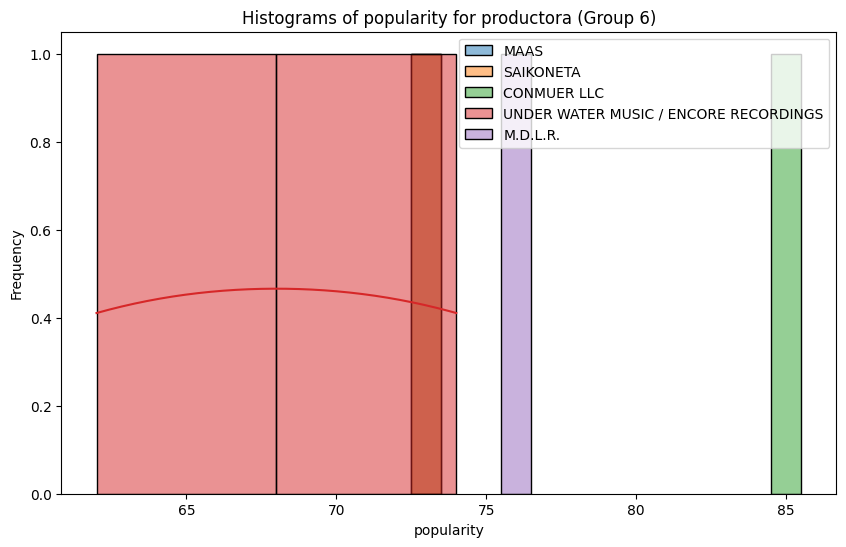

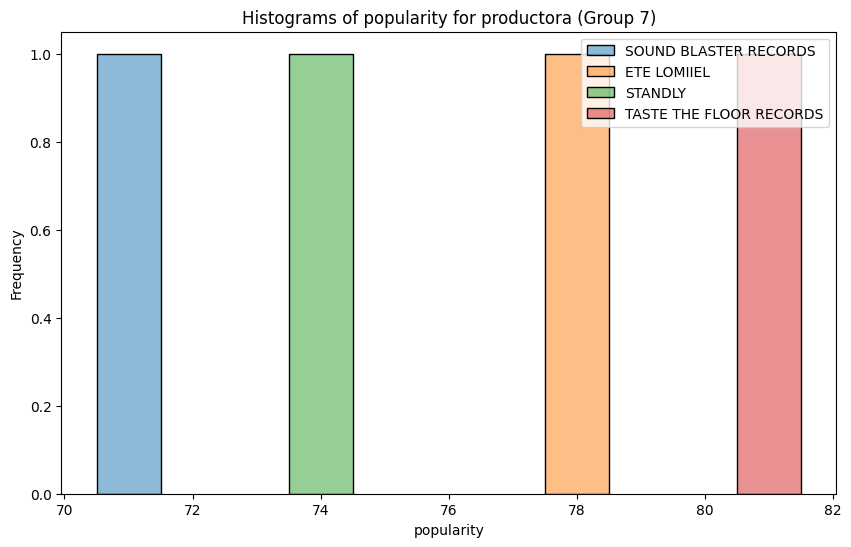

Productora: DQE PRODUCTIONS -> p_value: 0.00044
Productora: UNIVERSAL -> p_value: 0.02728
Productora: ONE WORLD MUSIC -> p_value: 0.48126
Productora: SONY MUSIC -> p_value: 0.56268
Productora: BALLER INC. -> No hay suficientes datos para la prueba
Productora: RABAT MUSIC SL -> p_value: 0.28927
Productora: MR. 305 RECORDS -> No hay suficientes datos para la prueba
Productora: LAX MUSIC, LLC / UNIVERSAL -> No hay suficientes datos para la prueba
Productora: SONAR LLC -> p_value: 0.17218
Productora: JC REYES -> p_value: 0.22250
Productora: PARIS LG LTD -> No hay suficientes datos para la prueba
Productora: WARNER MUSIC -> p_value: 0.02825
Productora: LF BABYS -> No hay suficientes datos para la prueba
Productora: RIOT GAMES -> No hay suficientes datos para la prueba
Productora: UNIVERSAL/WARNER MUSIC -> No hay suficientes datos para la prueba
Productora: LA INDUSTRIA/SONY MUSIC -> No hay suficientes datos para la prueba
Productora: DALE PLAY RECORDS/SSJ RECORDS -> No hay suficientes datos

In [111]:
plot_grouped_histograms(df, 'productora', 'popularity', 5)
from scipy.stats import mannwhitneyu
prductoras = df['productora'].dropna().unique()

# Iterar sobre cada género y realizar la prueba U de Mann-Whitney
for prod in prductoras:
    group_yes = df.loc[df['productora'] == prod, 'popularity']
    group_no = df.loc[df['productora'] != prod, 'popularity']
    
    if len(group_yes) > 1 and len(group_no) > 1:  # Evitar errores con grupos muy pequeños
        u, p_value = mannwhitneyu(group_yes, group_no)
        print(f"Productora: {prod} -> p_value: {p_value:.5f}")
    else:
        print(f"Productora: {prod} -> No hay suficientes datos para la prueba")

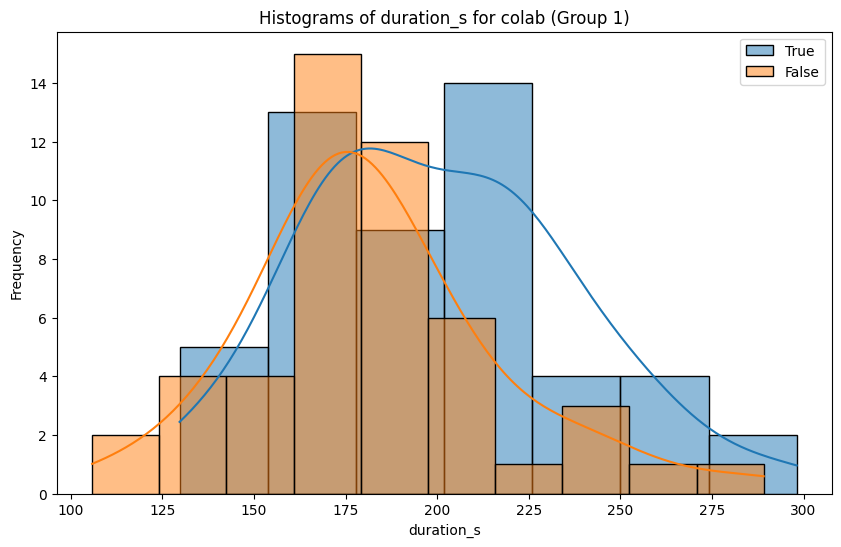

p_value: 0.010113940014841647


In [100]:
plot_grouped_histograms(df, 'colab', 'duration_s', 2)
from scipy.stats import mannwhitneyu
colab_true = df.loc[df.colab == True, 'duration_s']
colab_false = df.loc[df.colab == False, 'duration_s']
u, p_value = mannwhitneyu(colab_true, colab_false)
print(f'p_value: {p_value}')

##### Las duraciones cambian a mayor si es una colaboración, lo cual es esperable ya que hay varios artistas que tienen que compartir protagonismo

#### Categórica vs. Categórica

In [112]:
# vamos a tirar del hilo de la significancia del artista y de la productora. ¿Será que el éxito del artista tiene que ver con la productora que le respalda? ¿y viceversa?
from scipy.stats import mannwhitneyu

# Diccionario para artistas
pval_artistas = {}
for artist in df['artist'].dropna().unique():
    group_yes = df.loc[df['artist'] == artist, 'popularity']
    group_no = df.loc[df['artist'] != artist, 'popularity']
    
    if len(group_yes) > 1 and len(group_no) > 1:
        _, p_value = mannwhitneyu(group_yes, group_no)
        pval_artistas[artist] = p_value

# Diccionario para productoras
pval_productoras = {}
for prod in df['productora'].dropna().unique():
    group_yes = df.loc[df['productora'] == prod, 'popularity']
    group_no = df.loc[df['productora'] != prod, 'popularity']
    
    if len(group_yes) > 1 and len(group_no) > 1:
        _, p_value = mannwhitneyu(group_yes, group_no)
        pval_productoras[prod] = p_value
# Extraemos artista-productora únicos
artist_productora_pairs = df[['artist', 'productora']].drop_duplicates()


In [113]:
# Creamos una lista para guardar la info combinada
data_combined = []

for _, row in artist_productora_pairs.iterrows():
    artist = row['artist']
    prod = row['productora']
    pval_artist = pval_artistas.get(artist, None)
    pval_prod = pval_productoras.get(prod, None)
    
    data_combined.append({
        'Artist': artist,
        'Artist_pvalue': pval_artist,
        'Productora': prod,
        'Productora_pvalue': pval_prod
    })

# Convertimos a DataFrame
df_significance = pd.DataFrame(data_combined)
df_significance_sorted = df_significance.sort_values(by=['Artist_pvalue', 'Productora_pvalue'])


In [114]:
df_significance_sorted

,Artist,Artist_pvalue,Productora,Productora_pvalue
0,Quevedo,0.001244,DQE PRODUCTIONS,0.000443
59,Quevedo,0.001244,TASTE THE FLOOR RECORDS,NaN
28,Dani Martín,0.002252,SONY MUSIC,0.562683
32,Gonzy,0.048660,"VISONARE RECORDINGS, LLC",0.048660
1,KAROL G,0.068407,UNIVERSAL,0.027284
15,Kapo,0.114738,SONY MUSIC,0.562683
30,FloyyMenor,0.123491,FLOYYMENOR,0.123491
11,Lola Indigo,0.142551,UNIVERSAL,0.027284
12,JC Reyes,0.222501,JC REYES,0.222501
5,Cano,0.289274,RABAT MUSIC SL,0.289274


#### Numérica vs. Numérica

In [101]:
df.index.to_series().corr(df["popularity"])

-0.0948750972796485

##### Traget: popularity

6.735158290395343e-05

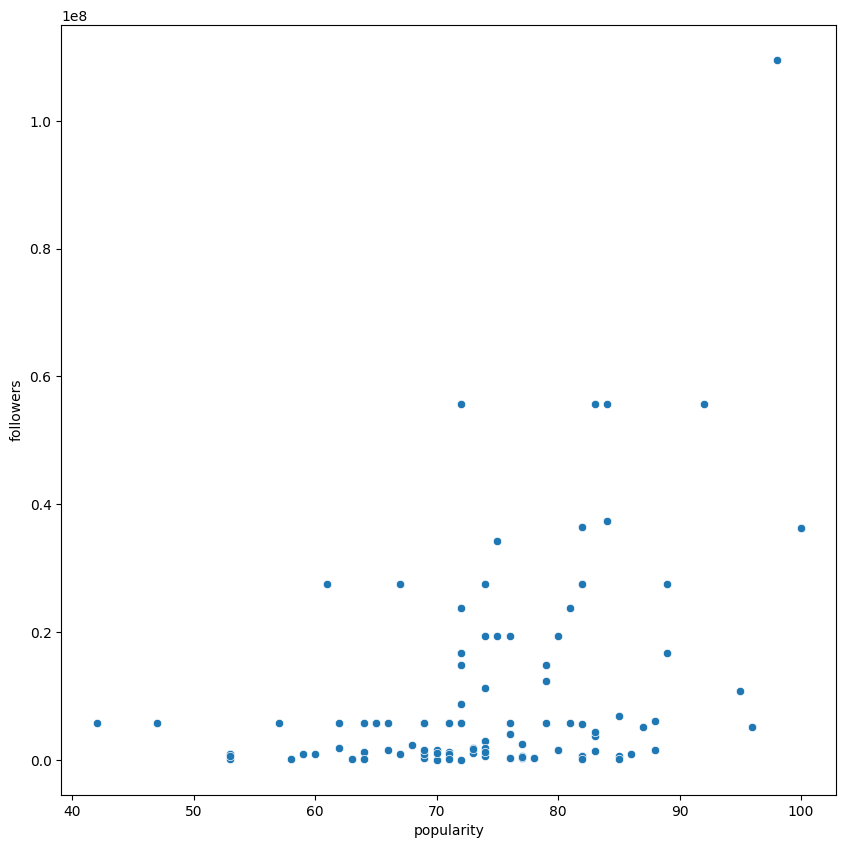

In [102]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = df.popularity, y = df['followers'].astype(int))
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['followers'].astype(int))
p

##### (3) Hasta ahora la relación más fuerte, y que respalda lo observado en la categórica del nombre del artista

0.027207566377021746

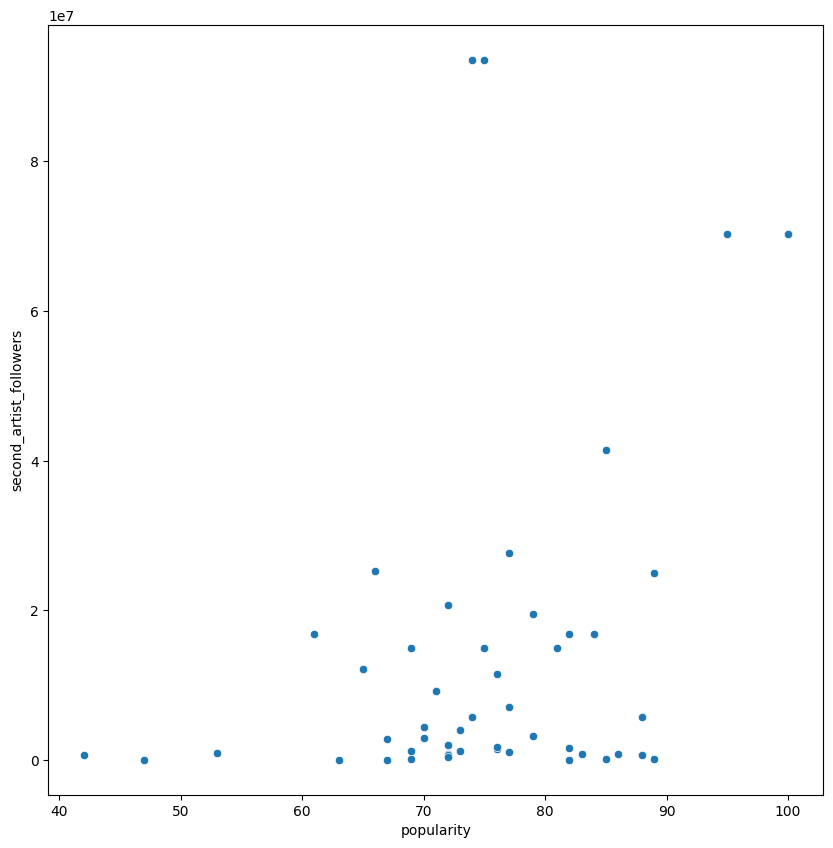

In [141]:
plt.figure(figsize=(10, 10))
df_colab = df[df.colab == True]
sns.scatterplot(x = df_colab.popularity, y = df_colab['second_artist_followers'].astype(int))
from scipy.stats import pearsonr
est, p = pearsonr(df_colab.popularity, df_colab['second_artist_followers'].astype(int))
p

In [103]:
artists

array(['Quevedo', 'KAROL G', 'Myke Towers', 'Rauw Alejandro', 'Clarent',
       'Cano', 'Omar Courtz', 'Los Sufridos', 'Shakira', 'Yan Block',
       'Sebastian Yatra', 'Lola Indigo', 'JC Reyes', 'Maluma',
       'Danny Ocean', 'Kapo', 'Beny Jr', 'Stromae', 'ROSÉ', 'Lady Gaga',
       'Dani Fernández', 'Manuel Turizo', 'Duki', 'Feid', 'Mariah Carey',
       'Isabel Aaiún', 'Rvssian', 'Dani Martín', 'Rvfv', 'FloyyMenor',
       'Blessd', 'Gonzy', 'La La Love You', 'Ghost Killer Track',
       'Teddy Swims', 'Wham!', 'DELLAFUENTE', 'Benson Boone',
       'Gracie Abrams', 'Billie Eilish', 'Ana Mena', 'SAIKO', 'Alleh',
       'Chayanne', 'Marshmello', 'Dei V', 'Morad', 'Yami Safdie',
       'Omar Montes', 'Marta Santos', 'Lomiiel', 'Maisak', 'Ela Taubert',
       'Estopa', 'Beéle', 'Cris Mj', 'Standly'], dtype=object)

In [104]:
# vamos a recoger la info que desprendimos en el punto (2) e intentar ver cómo la base de fans se relaciona con que un artista tenga o no una recorrido estable de éxito
# Filtrar artistas con al menos 2 canciones
artist_counts = df['artist'].value_counts()
artists_with_multiple = artist_counts[artist_counts > 1].index

# Filtrar el DataFrame original
df_filtered = df[df['artist'].isin(artists_with_multiple)]

# Calcular std de popularidad
artist_variability = df_filtered.groupby('artist')['popularity'].std()

# Obtener seguidores únicos por artista
followers_data = df_filtered[['artist', 'followers']].drop_duplicates().set_index('artist')

# Unir ambos
merged = artist_variability.to_frame(name='popularity_std').join(followers_data)

# Calcular la correlación
from scipy.stats import pearsonr
corr, p_value = pearsonr(merged['followers'], merged['popularity_std'])

print(f"Correlación entre seguidores y variabilidad de éxito: {corr:.3f}, p-valor: {p_value:.5f}")



Correlación entre seguidores y variabilidad de éxito: 0.237, p-valor: 0.36026


In [105]:
merged.sort_values('popularity_std', ascending=False).head(10)

,popularity_std,followers
artist,,
Cano,14.849242,564169
Feid,12.020815,16698752
Rauw Alejandro,11.238327,27509392
Quevedo,10.005881,5754626
Dei V,8.485281,1818022
KAROL G,8.220908,55739134
Gonzy,7.778175,134631
Sebastian Yatra,6.363961,23780003
FloyyMenor,5.656854,1606067


In [106]:
print(f"Artistas totales: {df['artist'].nunique()}")
print(f"Artistas con >1 canción: {len(artists_with_multiple)}")


Artistas totales: 57
Artistas con >1 canción: 17


0.5748465237864463

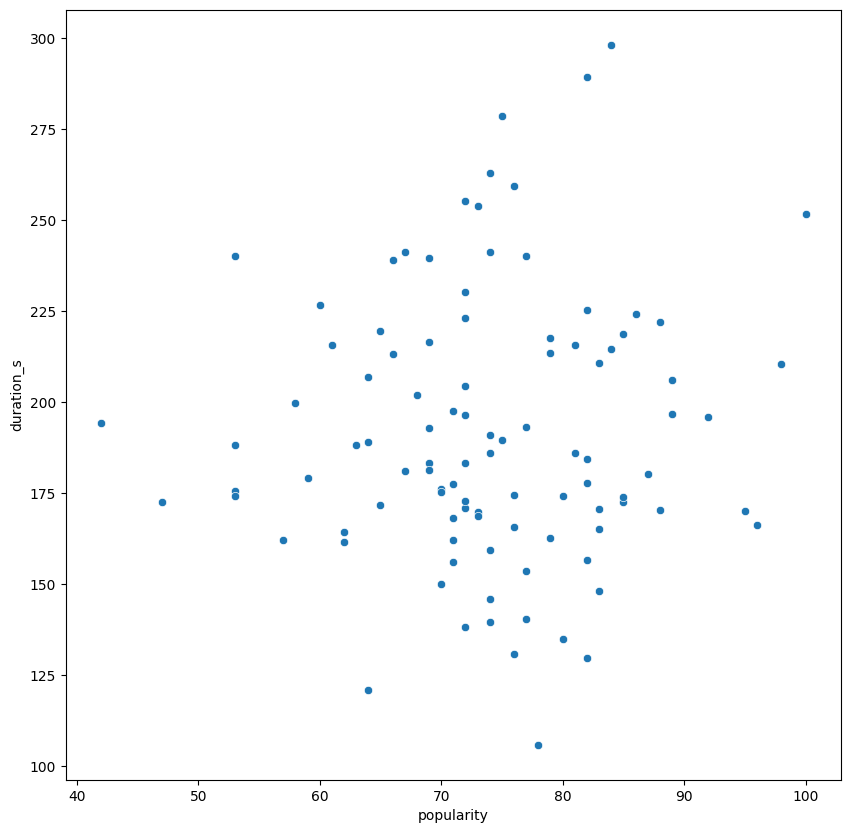

In [61]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = df.popularity, y = df['duration_s'])
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['duration_s'])
p

0.5333106860263104

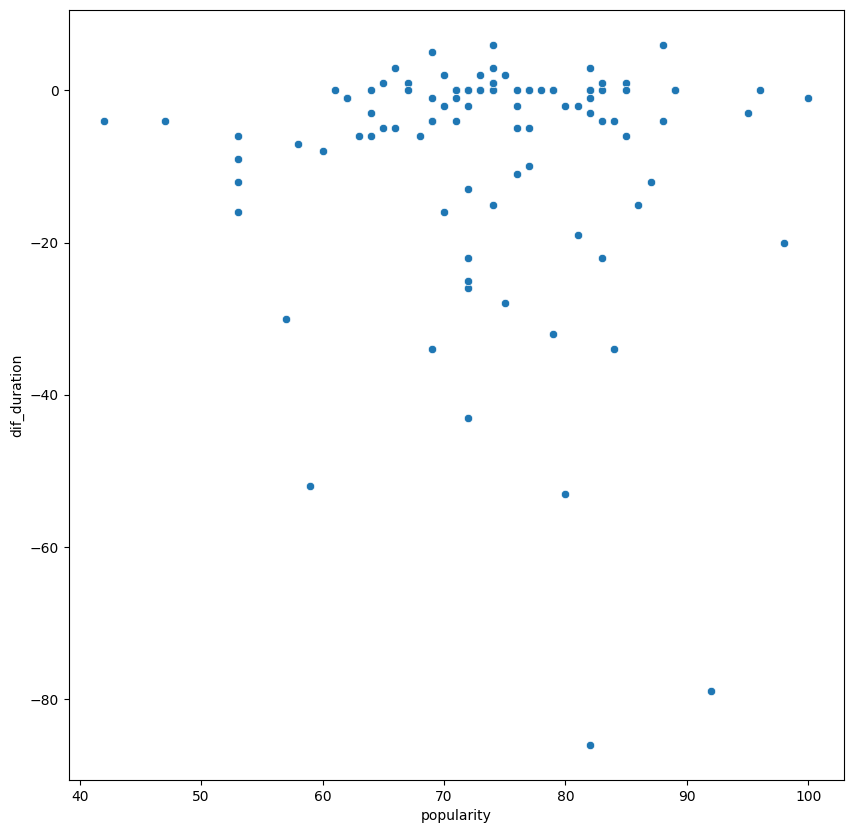

In [62]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = df.popularity, y = df['dif_duration'])
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['dif_duration'])
p

<Axes: xlabel='popularity', ylabel='bpm'>

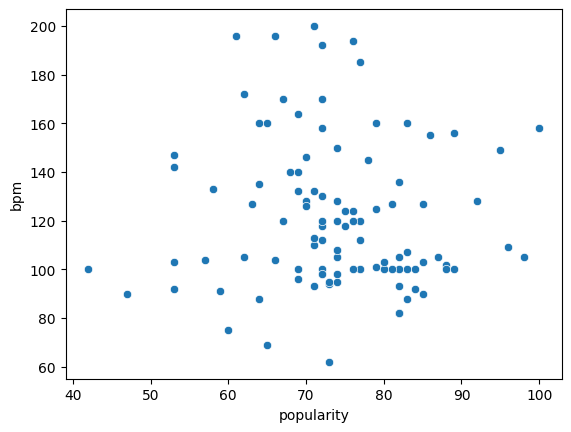

In [76]:
sns.scatterplot(x = df.popularity, y = df['bpm'])

In [72]:
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['bpm'])
p

0.6285979909812274

In [78]:
df.columns

Index(['track_name', 'artist_name', 'album_name', 'artist',
       'artist_popularity', 'followers', 'top genre', 'genres', 'productora',
       'colab', 'explicit', 'release_date', 'popularity', 'duration_s', 'bpm',
       'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop',
       'duration_yt', 'tempo', 'key', 'avg_rms', 'avg_flatness', 'num_onsets',
       'onset_density', 'format', 'dif_duration'],
      dtype='object')

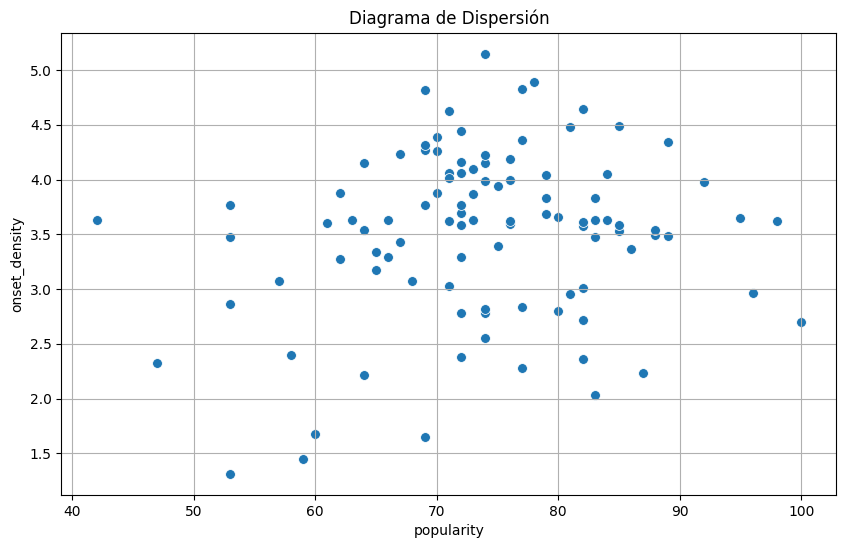

Estadístico: 0.1683016056000005
p-value: 0.09416624106456105


In [109]:
grafico_dispersion_con_correlacion(df, 'popularity', 'onset_density')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['onset_density'])
print(f'Estadístico: {est}')
print(f'p-value: {p}')

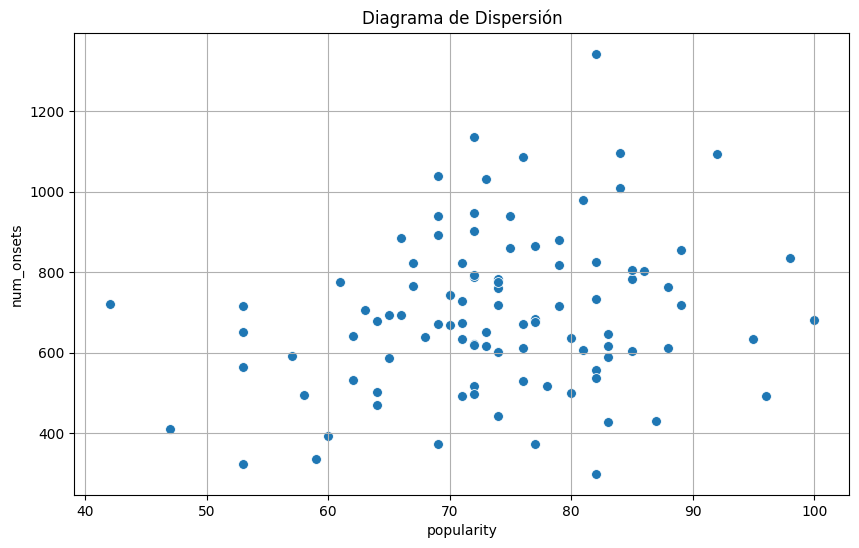

0.03264158313676344

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'num_onsets')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['num_onsets'])
p

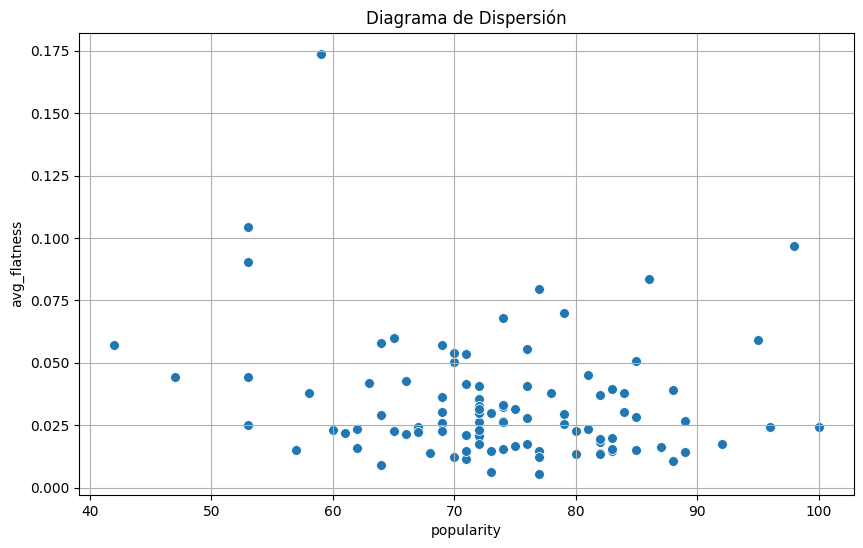

0.05604473658586342

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'avg_flatness')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['avg_flatness'])
p

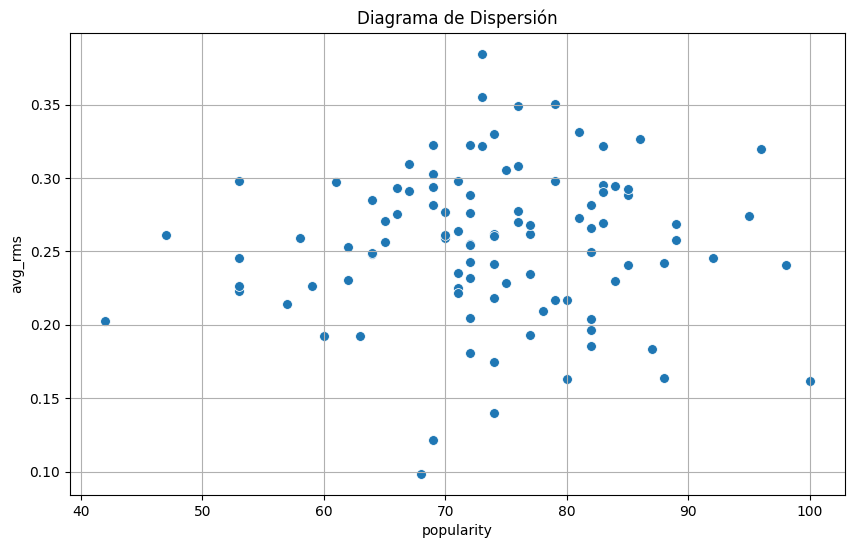

0.6512189354814457

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'avg_rms')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['avg_rms'])
p

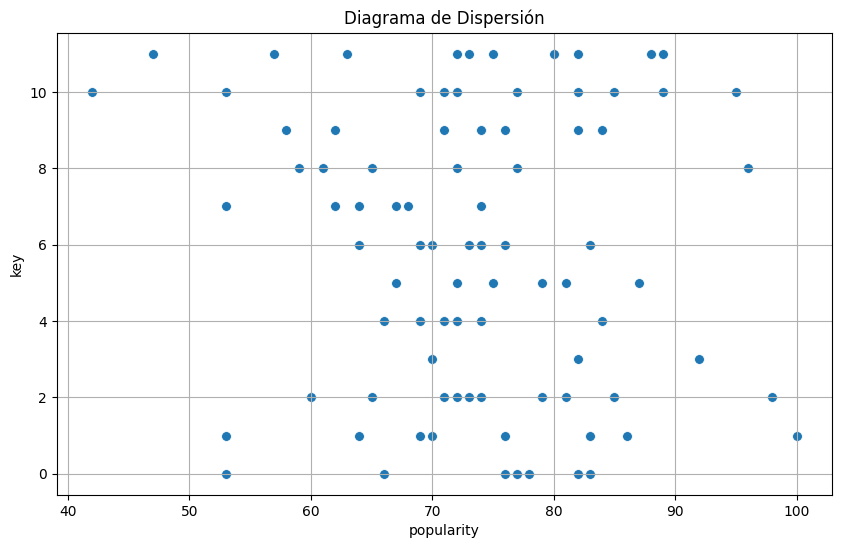

0.37187681867981554

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'key')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['key'])
p

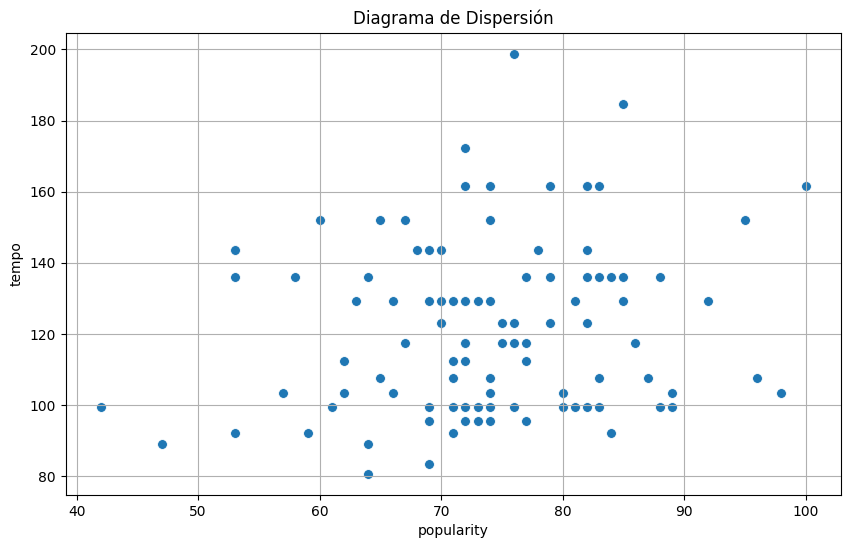

0.11543747613096095

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'tempo')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['tempo'])
p

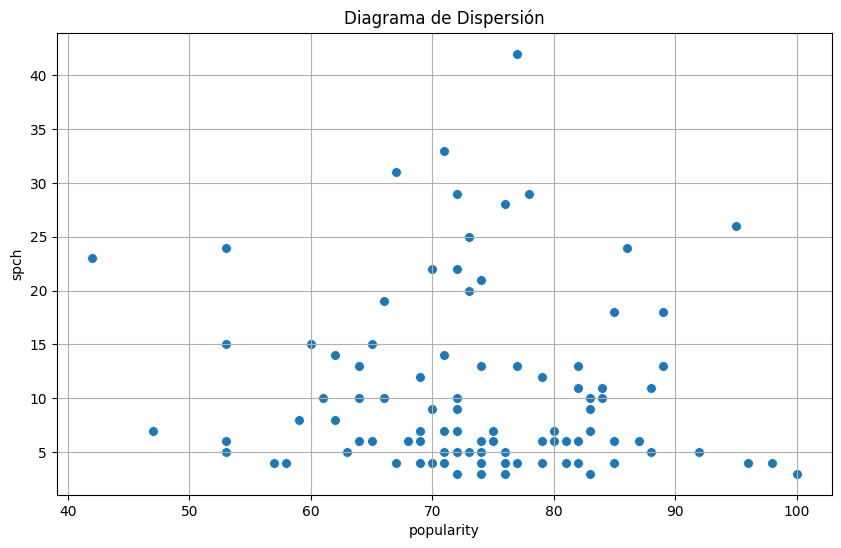

0.38822791755701735

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'spch')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['spch'])
p

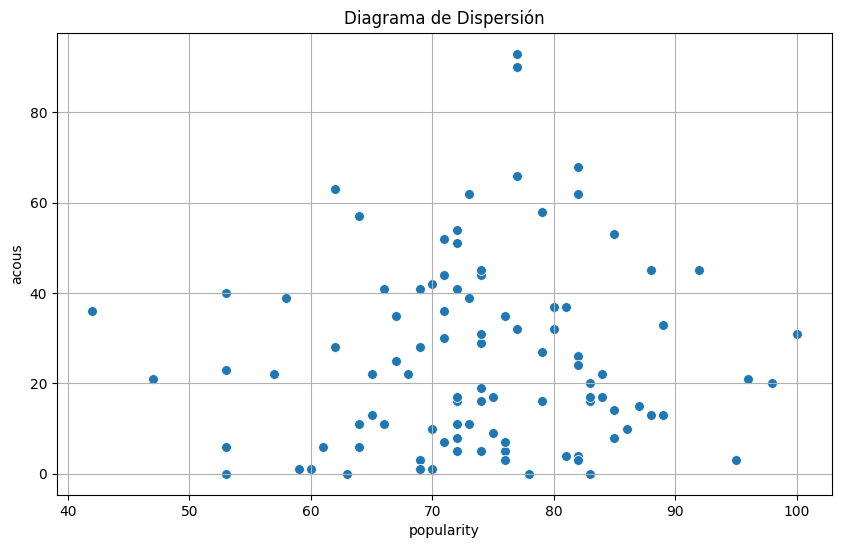

0.6185463892875273

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'acous')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['acous'])
p

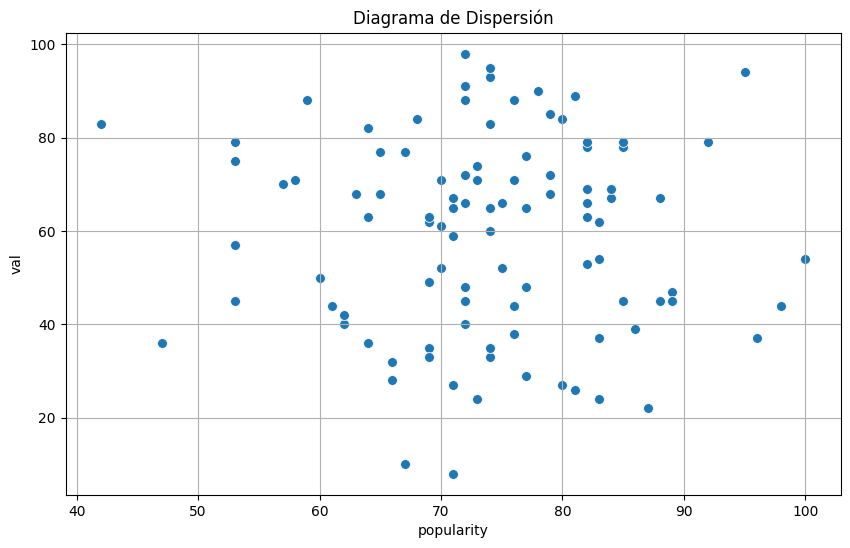

0.7848245606788857

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'val')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['val'])
p

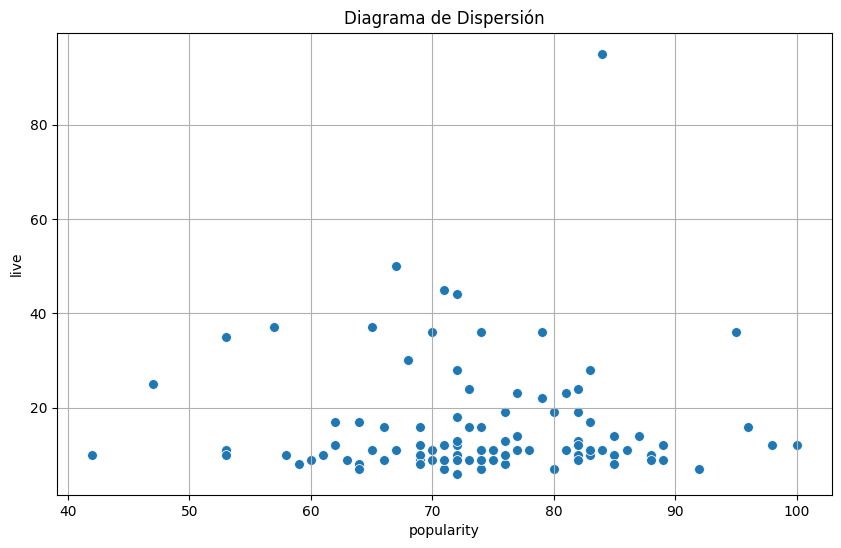

0.9440236083289983

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'live')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['live'])
p

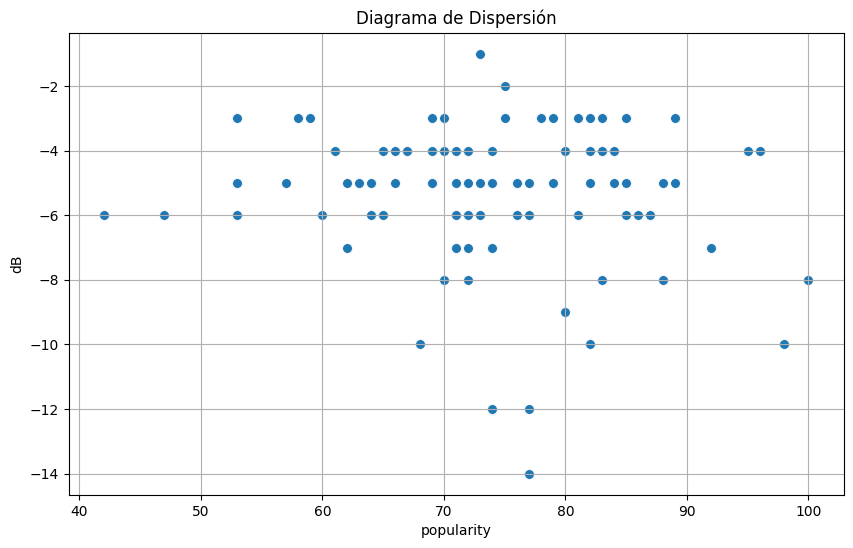

0.30903652213566507

In [ ]:
grafico_dispersion_con_correlacion(df, 'popularity', 'dB')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['dB'])
p

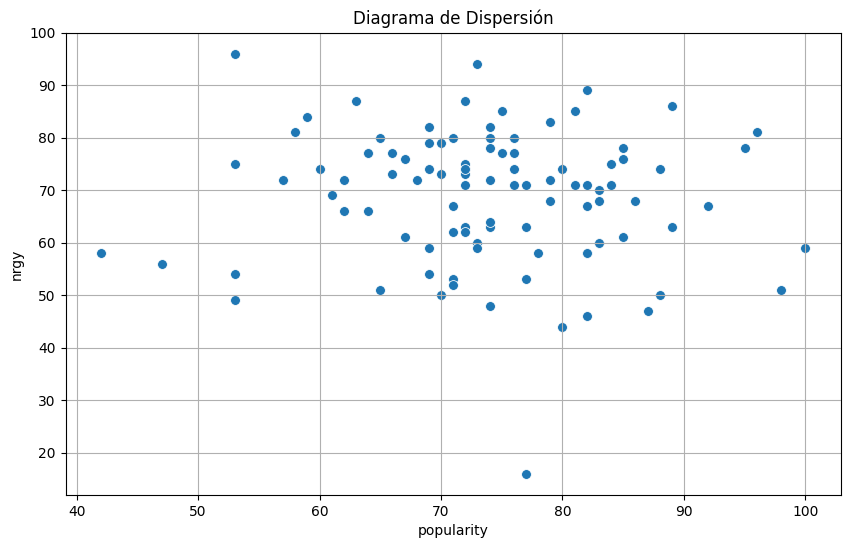

0.4378024761363192

In [82]:
grafico_dispersion_con_correlacion(df, 'popularity', 'nrgy')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['nrgy'])
p

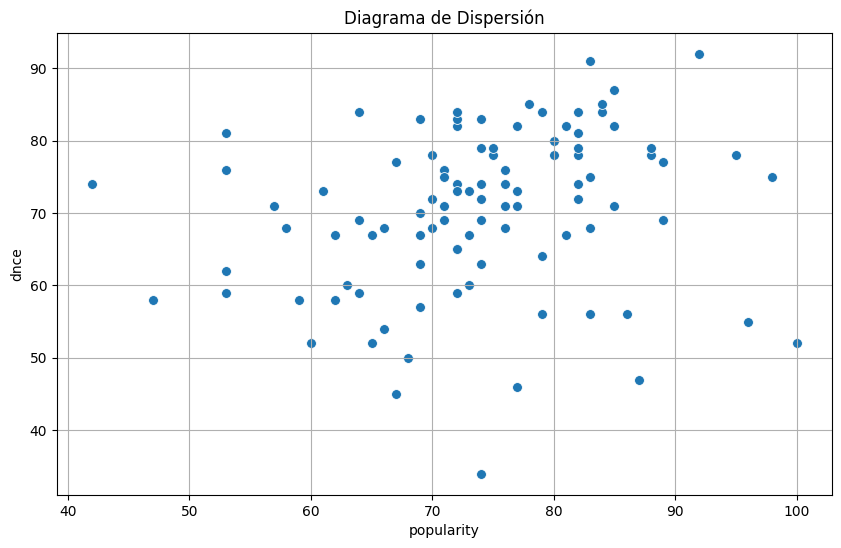

0.0380046790450333

In [80]:
grafico_dispersion_con_correlacion(df, 'popularity', 'dnce')
from scipy.stats import pearsonr
est, p = pearsonr(df.popularity, df['dnce'])
p

In [120]:
correlaciones = df.corr(numeric_only=True)[['popularity']].sort_values('popularity', ascending=False)

In [121]:
correlaciones

,popularity
popularity,1.000000
artist_popularity,0.470479
followers,0.387714
second_artist_followers,0.309297
num_onsets,0.213857
dnce,0.207822
onset_density,0.168302
tempo,0.158417
explicit,0.091693
colab,0.083090


In [118]:
from scipy.stats import pearsonr
correlaciones.index
correlaciones['p_value'] = None
for var in correlaciones.index:
    _, correlaciones['p_value'][var] = pearsonr(df.popularity, df[var])

C:\Users\Eva\AppData\Local\Temp\ipykernel_15208\1190506173.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  _, correlaciones['p_value'][var] = pearsonr(df.popularity, df[var])
C:\Users\Eva\AppData\Local\Temp\ipykernel_15208\1190506173.py:

In [119]:
correlaciones[correlaciones.p_value < 0.1]

,popularity,p_value
popularity,1.000000,0.0
artist_popularity,0.470479,0.000001
followers,0.387714,0.000067
num_onsets,0.213857,0.032642
dnce,0.207822,0.038005
onset_density,0.168302,0.094166
avg_flatness,-0.191703,0.056045


### 3 o más variables

In [122]:
# nos preguntamos si será que con quién colabores sí que tiene efecto en que la colaboración haga por la popularidad sostenida del lanzamiento
# Solo usar canciones con colaborador
df_collab = df[df['colab'] == True]

# Umbral: por ejemplo, mediana
threshold = df_collab['second_artist_followers'].median()

# Crear variable binaria según el umbral
df_collab['high_followed_collab'] = df_collab['second_artist_followers'] > threshold
from scipy.stats import mannwhitneyu

high = df_collab[df_collab['high_followed_collab']]['popularity']
low = df_collab[~df_collab['high_followed_collab']]['popularity']

if len(high) > 1 and len(low) > 1:
    u, p = mannwhitneyu(high, low)
    print(f"U = {u}, p-value = {p:.5f}")
else:
    print("No hay suficientes datos para la prueba")


U = 385.5, p-value = 0.25759


C:\Users\Eva\AppData\Local\Temp\ipykernel_15208\2461118729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collab['high_followed_collab'] = df_collab['second_artist_followers'] > threshold


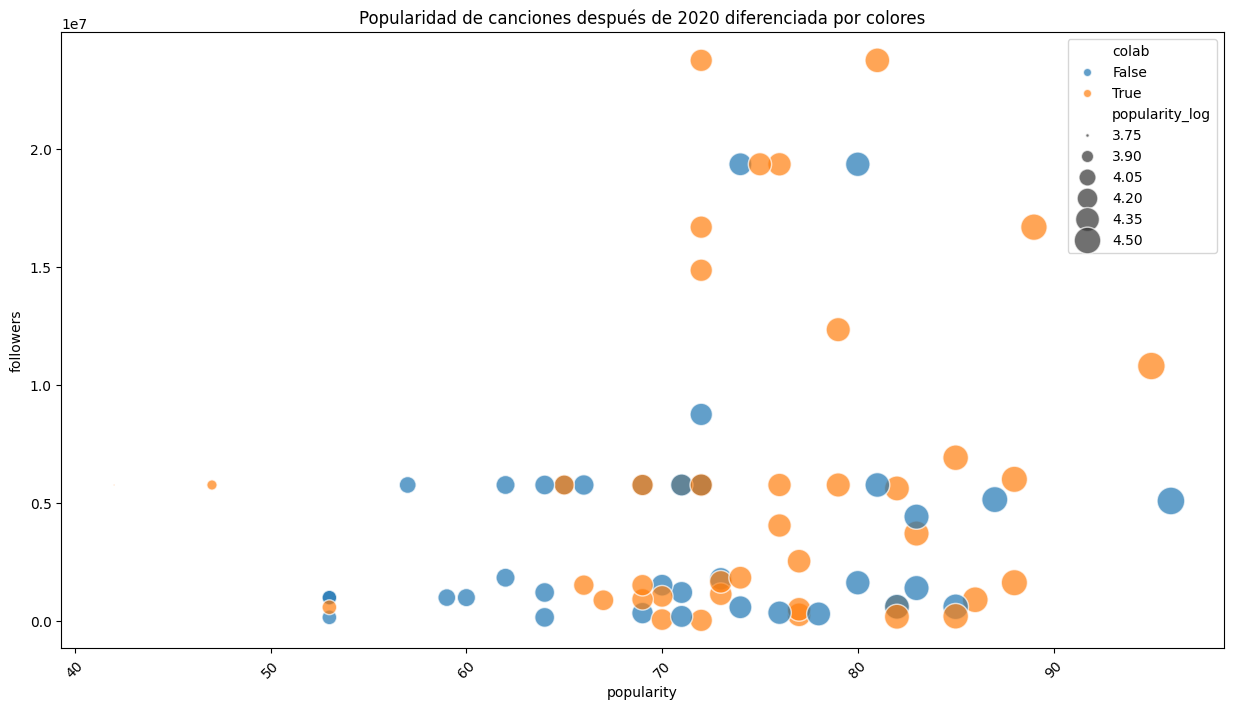

In [172]:
df_actual_filtered = df[(df.release_date > '2023') & (df.followers < 25000000)].copy()
df_actual_filtered["popularity_log"] = np.log(df_actual_filtered["popularity"])

# Gráfico con diferenciación por color
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=df_actual_filtered, 
    x="popularity", 
    y='followers',
    hue="colab",  # Diferenciamos por color
    alpha=0.7, 
    size="popularity_log",  # Usamos la transformación logarítmica
    sizes=(1, 400)
)

plt.xticks(rotation=45)
plt.title("Popularidad de canciones después de 2020 diferenciada por colores")
plt.show()

Nos deja la pregunta de, ¿será que el dato de popularidad en Spotify tiene más que ver con el número en absoluto de reproducciones, que de lo en tendencia que está aún en la actualidad?